In [168]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
#read csv
data = pd.read_csv('MY2010-2014 Fuel Consumption Ratings 5-cycle.csv', encoding='latin1', low_memory=False)
#copy daata
df = data.copy()

In [170]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df.head(5)

MODEL   MAKE                 MODEL.1 VEHICLE CLASS ENGINE SIZE  CYLINDERS  \
0  YEAR    NaN  # = high output engine           NaN         (L)        NaN   
1  2010  ACURA                     CSX       COMPACT         2.0        4.0   
2  2010  ACURA                     CSX       COMPACT         2.0        4.0   
3  2010  ACURA                     CSX       COMPACT         2.0        4.0   
4  2010  ACURA                 MDX AWD           SUV         3.7        6.0   

  TRANSMISSION  FUEL FUEL CONSUMPTION*      Unnamed: 9  ... Unnamed: 211  \
0          NaN  TYPE   CITY (L/100 km)  HWY (L/100 km)  ...          NaN   
1          AS5     X              10.9             7.8  ...          NaN   
2           M5     X              10.0             7.6  ...          NaN   
3           M6     Z              11.6             8.1  ...          NaN   
4          AS6     Z              14.8            11.3  ...          NaN   

  Unnamed: 212 Unnamed: 213  Unnamed: 214  Unnamed: 215  Unnamed: 216  \
0          NaN          NaN           NaN           NaN           NaN   
1          NaN          NaN           NaN           NaN           NaN   
2          NaN          NaN           NaN           NaN           NaN   
3          NaN          NaN           NaN           NaN           NaN   
4          NaN          NaN           NaN           NaN           NaN   

   Unnamed: 217  Unnamed: 218  Unnamed: 219  Unnamed: 220  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN  

[5 rows x 221 columns]

### observation
- Empty columns from coloumn 15
- row 0 is part of the coloumn name

### Data Cleaning and Exploration

In [171]:
for i, v in enumerate(df.columns):
    print(i, v)

0 MODEL
1 MAKE
2 MODEL.1
3 VEHICLE CLASS
4 ENGINE SIZE
5 CYLINDERS
6 TRANSMISSION
7 FUEL
8 FUEL CONSUMPTION*
9 Unnamed: 9
10 Unnamed: 10
11 Unnamed: 11
12 CO2 EMISSIONS 
13 Unnamed: 13
14 Unnamed: 14
15 Unnamed: 15
16 Unnamed: 16
17 Unnamed: 17
18 Unnamed: 18
19 Unnamed: 19
20 Unnamed: 20
21 Unnamed: 21
22 Unnamed: 22
23 Unnamed: 23
24 Unnamed: 24
25 Unnamed: 25
26 Unnamed: 26
27 Unnamed: 27
28 Unnamed: 28
29 Unnamed: 29
30 Unnamed: 30
31 Unnamed: 31
32 Unnamed: 32
33 Unnamed: 33
34 Unnamed: 34
35 Unnamed: 35
36 Unnamed: 36
37 Unnamed: 37
38 Unnamed: 38
39 Unnamed: 39
40 Unnamed: 40
41 Unnamed: 41
42 Unnamed: 42
43 Unnamed: 43
44 Unnamed: 44
45 Unnamed: 45
46 Unnamed: 46
47 Unnamed: 47
48 Unnamed: 48
49 Unnamed: 49
50 Unnamed: 50
51 Unnamed: 51
52 Unnamed: 52
53 Unnamed: 53
54 Unnamed: 54
55 Unnamed: 55
56 Unnamed: 56
57 Unnamed: 57
58 Unnamed: 58
59 Unnamed: 59
60 Unnamed: 60
61 Unnamed: 61
62 Unnamed: 62
63 Unnamed: 63
64 Unnamed: 64
65 Unnamed: 65
66 Unnamed: 66
67 Unnamed: 67
68 Un

In [172]:
#drop multiple columns by slicing
df.drop(df.columns[13:], axis=1, inplace=True)

#reference : https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [173]:
for i, v in enumerate(df.columns):
    print(i, v)

0 MODEL
1 MAKE
2 MODEL.1
3 VEHICLE CLASS
4 ENGINE SIZE
5 CYLINDERS
6 TRANSMISSION
7 FUEL
8 FUEL CONSUMPTION*
9 Unnamed: 9
10 Unnamed: 10
11 Unnamed: 11
12 CO2 EMISSIONS 


In [174]:
df.head(5)

MODEL   MAKE                 MODEL.1 VEHICLE CLASS ENGINE SIZE  CYLINDERS  \
0  YEAR    NaN  # = high output engine           NaN         (L)        NaN   
1  2010  ACURA                     CSX       COMPACT         2.0        4.0   
2  2010  ACURA                     CSX       COMPACT         2.0        4.0   
3  2010  ACURA                     CSX       COMPACT         2.0        4.0   
4  2010  ACURA                 MDX AWD           SUV         3.7        6.0   

  TRANSMISSION  FUEL FUEL CONSUMPTION*      Unnamed: 9      Unnamed: 10  \
0          NaN  TYPE   CITY (L/100 km)  HWY (L/100 km)  COMB (L/100 km)   
1          AS5     X              10.9             7.8              9.5   
2           M5     X              10.0             7.6              8.9   
3           M6     Z              11.6             8.1             10.0   
4          AS6     Z              14.8            11.3             13.2   

  Unnamed: 11 CO2 EMISSIONS   
0  COMB (mpg)         (g/km)  
1          30            219  
2          32            205  
3          28            230  
4          21            304

In [175]:
#rename variables
df = df.rename(columns={"MODEL":"MODEL YEAR","MODEL.1":"MODEL", "ENGINE SIZE":"ENGINE SIZE(L)","FUEL":"FUEL TYPE", "FUEL CONSUMPTION*":"FC CITY (L/100 km)",
                        "Unnamed: 9":"FC HWY (L/100 km)", "Unnamed: 10": "FC COMBINED(L/100 km)",
                        "Unnamed: 11":"FC COMBINED(mpg)","CO2 EMISSIONS ":"CO2 EMISSIONS"})

In [176]:
df.head()

MODEL YEAR   MAKE                   MODEL VEHICLE CLASS ENGINE SIZE(L)  \
0       YEAR    NaN  # = high output engine           NaN            (L)   
1       2010  ACURA                     CSX       COMPACT            2.0   
2       2010  ACURA                     CSX       COMPACT            2.0   
3       2010  ACURA                     CSX       COMPACT            2.0   
4       2010  ACURA                 MDX AWD           SUV            3.7   

   CYLINDERS TRANSMISSION FUEL TYPE FC CITY (L/100 km) FC HWY (L/100 km)  \
0        NaN          NaN      TYPE    CITY (L/100 km)    HWY (L/100 km)   
1        4.0          AS5         X               10.9               7.8   
2        4.0           M5         X               10.0               7.6   
3        4.0           M6         Z               11.6               8.1   
4        6.0          AS6         Z               14.8              11.3   

  FC COMBINED(L/100 km) FC COMBINED(mpg) CO2 EMISSIONS  
0       COMB (L/100 km)       COMB (mpg)        (g/km)  
1                   9.5               30           219  
2                   8.9               32           205  
3                  10.0               28           230  
4                  13.2               21           304

In [177]:
#remove row 0
df = df.drop([0])
df.head()

MODEL YEAR   MAKE          MODEL VEHICLE CLASS ENGINE SIZE(L)  CYLINDERS  \
1       2010  ACURA            CSX       COMPACT            2.0        4.0   
2       2010  ACURA            CSX       COMPACT            2.0        4.0   
3       2010  ACURA            CSX       COMPACT            2.0        4.0   
4       2010  ACURA        MDX AWD           SUV            3.7        6.0   
5       2010  ACURA  RDX AWD TURBO           SUV            2.3        4.0   

  TRANSMISSION FUEL TYPE FC CITY (L/100 km) FC HWY (L/100 km)  \
1          AS5         X               10.9               7.8   
2           M5         X               10.0               7.6   
3           M6         Z               11.6               8.1   
4          AS6         Z               14.8              11.3   
5          AS5         Z               13.2              10.3   

  FC COMBINED(L/100 km) FC COMBINED(mpg) CO2 EMISSIONS  
1                   9.5               30           219  
2                   8.9               32           205  
3                  10.0               28           230  
4                  13.2               21           304  
5                  11.9               24           274

In [178]:
#reset index
df.reset_index(drop=True, inplace= True)

In [179]:
df.head()

MODEL YEAR   MAKE          MODEL VEHICLE CLASS ENGINE SIZE(L)  CYLINDERS  \
0       2010  ACURA            CSX       COMPACT            2.0        4.0   
1       2010  ACURA            CSX       COMPACT            2.0        4.0   
2       2010  ACURA            CSX       COMPACT            2.0        4.0   
3       2010  ACURA        MDX AWD           SUV            3.7        6.0   
4       2010  ACURA  RDX AWD TURBO           SUV            2.3        4.0   

  TRANSMISSION FUEL TYPE FC CITY (L/100 km) FC HWY (L/100 km)  \
0          AS5         X               10.9               7.8   
1           M5         X               10.0               7.6   
2           M6         Z               11.6               8.1   
3          AS6         Z               14.8              11.3   
4          AS5         Z               13.2              10.3   

  FC COMBINED(L/100 km) FC COMBINED(mpg) CO2 EMISSIONS  
0                   9.5               30           219  
1                   8.9               32           205  
2                  10.0               28           230  
3                  13.2               21           304  
4                  11.9               24           274

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MODEL YEAR             5368 non-null   object 
 1   MAKE                   5378 non-null   object 
 2   MODEL                  5359 non-null   object 
 3   VEHICLE CLASS          5359 non-null   object 
 4   ENGINE SIZE(L)         5359 non-null   object 
 5   CYLINDERS              5359 non-null   float64
 6   TRANSMISSION           5359 non-null   object 
 7   FUEL TYPE              5359 non-null   object 
 8   FC CITY (L/100 km)     5359 non-null   object 
 9   FC HWY (L/100 km)      5359 non-null   object 
 10  FC COMBINED(L/100 km)  5359 non-null   object 
 11  FC COMBINED(mpg)       5359 non-null   object 
 12  CO2 EMISSIONS          5359 non-null   object 
dtypes: float64(1), object(12)
memory usage: 546.9+ KB


### observations
- variables that are meant to be float is showing as object

In [181]:
#check for duplicated
df.duplicated().sum()

1

In [182]:
#remove duplicates
df = df.drop_duplicates()

#reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [183]:
df.duplicated().sum()

0

In [184]:
df.isnull().sum()
#all coloumns have missing values

MODEL YEAR               15
MAKE                      5
MODEL                    24
VEHICLE CLASS            24
ENGINE SIZE(L)           24
CYLINDERS                24
TRANSMISSION             24
FUEL TYPE                24
FC CITY (L/100 km)       24
FC HWY (L/100 km)        24
FC COMBINED(L/100 km)    24
FC COMBINED(mpg)         24
CO2 EMISSIONS            24
dtype: int64

In [185]:
df["MODEL YEAR"].unique()
#error

array(['2010', '2011', '2012', '2013', '2014', nan,
       '*Starting with the 2015 model year, vehicle manufacturers will use an improved testing procedure to determine the fuel consumption ratings of new light-duty vehicles. The new test methods result in higher fuel consumption ratings that are',
       'more representative of everyday driving. To help you compare vehicles from different model years, the ratings for 1995-2014 vehicles have been adjusted to reflect the new test methods. Note that these  are approximate values that were ',
       'generated from the original ratings, not from vehicle testing.',
       'Understanding the Table', 'Model', 'Transmission', 'Fuel Type',
       'Fuel Consumption', 'CO2 Emissions (g/km)'], dtype=object)

In [186]:
df.tail(40)

MODEL YEAR  \
5343                                               2014   
5344                                               2014   
5345                                               2014   
5346                                               2014   
5347                                               2014   
5348                                               2014   
5349                                               2014   
5350                                               2014   
5351                                               2014   
5352                                               2014   
5353                                               2014   
5354                                               2014   
5355                                               2014   
5356                                               2014   
5357                                               2014   
5358                                               2014   
5359                                                NaN   
5360  *Starting with the 2015 model year, vehicle ma...   
5361  more representative of everyday driving. To he...   
5362  generated from the original ratings, not from ...   
5364                            Understanding the Table   
5365                                              Model   
5366                                                NaN   
5367                                                NaN   
5368                                                NaN   
5369                                                NaN   
5370                                                NaN   
5371                                       Transmission   
5372                                                NaN   
5373                                                NaN   
5374                                                NaN   
5375                                                NaN   
5376                                                NaN   
5377                                          Fuel Type   
5378                                                NaN   
5379                                                NaN   
5380                                                NaN   
5381                                                NaN   
5382                                   Fuel Consumption   
5383                               CO2 Emissions (g/km)   

                                                   MAKE  \
5343                                         VOLKSWAGEN   
5344                                         VOLKSWAGEN   
5345                                         VOLKSWAGEN   
5346                                         VOLKSWAGEN   
5347                                         VOLKSWAGEN   
5348                                              VOLVO   
5349                                              VOLVO   
5350                                              VOLVO   
5351                                              VOLVO   
5352                                              VOLVO   
5353                                              VOLVO   
5354                                              VOLVO   
5355                                              VOLVO   
5356                                              VOLVO   
5357                                              VOLVO   
5358                                              VOLVO   
5359                                                NaN   
5360                                                NaN   
5361                                                NaN   
5362                                                NaN   
5364                                                NaN   
5365                         4WD/4X4 = Four-wheel drive   
5366                              AWD = All-wheel drive   
5367                       CNG = Compressed natural gas   
5368                        FFV = Flexible-fuel vehicle   
5369                          NGV = Natural gas vehicle   
5370  # = High output engine tha

In [187]:
#issues from row 5360
#drop all rows from 5369
df.drop(df.index[5359:], inplace=True)

#reference: https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe

In [188]:
df.isna().sum()

MODEL YEAR               0
MAKE                     0
MODEL                    0
VEHICLE CLASS            0
ENGINE SIZE(L)           0
CYLINDERS                0
TRANSMISSION             0
FUEL TYPE                0
FC CITY (L/100 km)       0
FC HWY (L/100 km)        0
FC COMBINED(L/100 km)    0
FC COMBINED(mpg)         0
CO2 EMISSIONS            0
dtype: int64

In [189]:
df["MODEL YEAR"].unique()

array(['2010', '2011', '2012', '2013', '2014'], dtype=object)

In [190]:
df["MAKE"].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUGATTI',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FERRARI',
       'FORD', 'GMC', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'JAGUAR',
       'JEEP', 'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN',
       'MASERATI', 'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI',
       'NISSAN', 'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE', 'SMART', 'SUBARU',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'SCION', 'FIAT', 'RAM',
       'SRT', 'ALFA ROMEO'], dtype=object)

In [191]:
df["MODEL"].unique()

array(['CSX', 'MDX AWD', 'RDX AWD TURBO', ..., 'HIGHLANDER HYBRID AWD LE',
       'VENZA 4WD', 'JETTA GLI'], dtype=object)

In [192]:
df["VEHICLE CLASS"].unique()

array(['COMPACT', 'SUV', 'MID-SIZE', 'MINICOMPACT', 'TWO-SEATER',
       'STATION WAGON - SMALL', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'FULL-SIZE', 'PICKUP TRUCK - STANDARD', 'PICKUP TRUCK - SMALL',
       'VAN - CARGO', 'VAN - PASSENGER', 'MINIVAN',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'SUV - STANDARD'],
      dtype=object)

In [193]:
df["ENGINE SIZE(L)"].unique()

array(['2.0', '3.7', '2.3', '3.5', '2.4', '5.9', '4.7', '3.2', '3.0',
       '4.2', '3.6', '5.2', '6.8', '6.0', '2.5', '4.8', '4.4', '4.0',
       '5.0', '8.0', '3.9', '4.6', '6.2', '2.8', '5.3', '1.6', '2.2',
       '2.9', '7.0', '4.3', '5.7', '6.1', '2.7', '3.3', '8.4', '5.4',
       '1.8', '1.3', '1.5', '3.8', '4.5', '5.6', '6.5', '5.5', '3.4',
       '6.6', '6.7', '1.0', '1.4', '6.4', '6.3', '1.2', '5.8', '2.1'],
      dtype=object)

In [194]:
#convert to float
df["ENGINE SIZE(L)"]= df["ENGINE SIZE(L)"].astype('float')
df["ENGINE SIZE(L)"].unique()

array([2. , 3.7, 2.3, 3.5, 2.4, 5.9, 4.7, 3.2, 3. , 4.2, 3.6, 5.2, 6.8,
       6. , 2.5, 4.8, 4.4, 4. , 5. , 8. , 3.9, 4.6, 6.2, 2.8, 5.3, 1.6,
       2.2, 2.9, 7. , 4.3, 5.7, 6.1, 2.7, 3.3, 8.4, 5.4, 1.8, 1.3, 1.5,
       3.8, 4.5, 5.6, 6.5, 5.5, 3.4, 6.6, 6.7, 1. , 1.4, 6.4, 6.3, 1.2,
       5.8, 2.1])

In [195]:
df["CYLINDERS"].unique()

array([ 4.,  6., 12.,  8., 10., 16.,  5.,  2.,  3.])

In [196]:
df["TRANSMISSION"].unique()

array(['AS5', 'M5', 'M6', 'AS6', 'AM6', 'AV', 'AS7', 'A6', 'A8', 'A7',
       'AM7', 'A4', 'A5', 'AS4', 'AS8', 'M7', 'AV7', 'AV8', 'AV6', 'AM5',
       'A9', 'AS9'], dtype=object)

In [197]:
#df= df.replace({'TRANSMISSION':{'AS.*' : 'AS', 'AM.*' : 'AM', 'AV.*':'AV','M5':'M','M6':'M','M7':'M', 'A6':'A', 'A8':'A', 'A7':'A', 'A4':'A', 'A5':'A', 'A9':'A'} }, regex = True)                                                                                         

In [198]:
#df["TRANSMISSION"].unique()

In [199]:
df["FUEL TYPE"].unique()

array(['X', 'Z', 'D', 'E'], dtype=object)

In [200]:
df["FC CITY (L/100 km)"].unique()

array(['10.9', '10.0', '11.6', '14.8', '13.2', '14.7', '13.1', '13.8',
       '13.4', '11.0', '11.9', '12.8', '18.0', '20.8', '20.0', '21.1',
       '17.1', '19.3', '10.8', '11.8', '8.1', '10.2', '11.5', '12.9',
       '13.5', '13.0', '16.5', '17.9', '18.8', '18.9', '18.3', '13.6',
       '13.7', '14.5', '14.4', '16.8', '16.9', '11.1', '24.9', '23.0',
       '22.4', '12.2', '12.7', '12.6', '10.3', '13.3', '12.1', '15.1',
       '15.6', '16.7', '16.1', '17.6', '14.2', '17.3', '17.4', '17.0',
       '19.8', '21.9', '19.9', '22.3', '14.3', '15.2', '30.0', '15.0',
       '14.9', '18.1', '15.4', '14.6', '19.4', '16.6', '23.3', '15.7',
       '15.9', '21.6', '9.5', '8.7', '9.7', '10.6', '9.3', '14.0', '15.5',
       '16.0', '17.2', '10.5', '13.9', '23.5', '18.6', '23.9', '25.3',
       '15.3', '11.2', '22.2', '21.3', '24.1', '17.7', '23.2', '21.5',
       '20.7', '17.8', '12.5', '11.7', '10.4', '26.1', '20.3', '26.7',
       '18.5', '22.1', '21.8', '25.0', '24.5', '18.7', '20.2', '11.4',
   

In [201]:
#convert to float
df["FC CITY (L/100 km)"]= df["FC CITY (L/100 km)"].astype('float')
df["FC CITY (L/100 km)"].unique()

array([10.9, 10. , 11.6, 14.8, 13.2, 14.7, 13.1, 13.8, 13.4, 11. , 11.9,
       12.8, 18. , 20.8, 20. , 21.1, 17.1, 19.3, 10.8, 11.8,  8.1, 10.2,
       11.5, 12.9, 13.5, 13. , 16.5, 17.9, 18.8, 18.9, 18.3, 13.6, 13.7,
       14.5, 14.4, 16.8, 16.9, 11.1, 24.9, 23. , 22.4, 12.2, 12.7, 12.6,
       10.3, 13.3, 12.1, 15.1, 15.6, 16.7, 16.1, 17.6, 14.2, 17.3, 17.4,
       17. , 19.8, 21.9, 19.9, 22.3, 14.3, 15.2, 30. , 15. , 14.9, 18.1,
       15.4, 14.6, 19.4, 16.6, 23.3, 15.7, 15.9, 21.6,  9.5,  8.7,  9.7,
       10.6,  9.3, 14. , 15.5, 16. , 17.2, 10.5, 13.9, 23.5, 18.6, 23.9,
       25.3, 15.3, 11.2, 22.2, 21.3, 24.1, 17.7, 23.2, 21.5, 20.7, 17.8,
       12.5, 11.7, 10.4, 26.1, 20.3, 26.7, 18.5, 22.1, 21.8, 25. , 24.5,
       18.7, 20.2, 11.4, 12.3,  6.9,  7.8, 19.1, 22.8, 24. ,  9.8,  5.7,
       19.7, 25.1, 24.7,  8.6,  5.8,  8.3,  8.4,  5.9,  6.1, 16.4, 26.5,
        8.8,  9.1,  9.4, 16.3, 11.3,  9.6, 12. ,  9.2,  8.9,  9.9, 20.6,
       26.3, 28.3,  6.7,  7.5, 19. , 20.4, 21.4, 10

In [202]:
df["FC HWY (L/100 km)"].unique()

array(['7.8', '7.6', '8.1', '11.3', '10.3', '10.6', '8.9', '9.6', '9.5',
       '8.3', '8.8', '11.9', '13.7', '13.1', '14.2', '11.7', '12.7',
       '8.2', '8.0', '6.4', '8.7', '9.0', '8.5', '12.2', '9.8', '12.9',
       '12.1', '13.6', '9.4', '10.5', '11.1', '15.3', '13.9', '13.3',
       '9.1', '9.3', '6.5', '9.7', '10.1', '10.9', '10.7', '11.8', '11.0',
       '12.0', '11.4', '13.8', '18.1', '9.9', '8.6', '12.3', '15.5',
       '10.4', '14.7', '7.0', '6.8', '7.1', '7.9', '7.3', '13.4', '17.7',
       '14.1', '18.4', '18.5', '19.3', '10.2', '16.7', '12.5', '16.9',
       '17.8', '11.2', '12.6', '17.4', '14.4', '7.5', '11.5', '18.2',
       '19.6', '18.8', '15.4', '15.0', '15.2', '18.3', '12.8', '16.6',
       '6.7', '17.5', '17.0', '5.2', '6.6', '5.5', '5.6', '14.5', '19.9',
       '7.4', '13.5', '14.3', '16.2', '7.2', '15.7', '16.1', '15.1',
       '16.3', '13.0', '5.8', '4.9', '6.1', '6.2', '19.4', '14.9', '20.2',
       '20.4', '19.7', '20.8', '16.5', '5.9', '6.0', '6.3', '17.3',


In [203]:
#convert to float
df["FC HWY (L/100 km)"]= df["FC HWY (L/100 km)"].astype('float')
df["FC HWY (L/100 km)"].unique()

array([ 7.8,  7.6,  8.1, 11.3, 10.3, 10.6,  8.9,  9.6,  9.5,  8.3,  8.8,
       11.9, 13.7, 13.1, 14.2, 11.7, 12.7,  8.2,  8. ,  6.4,  8.7,  9. ,
        8.5, 12.2,  9.8, 12.9, 12.1, 13.6,  9.4, 10.5, 11.1, 15.3, 13.9,
       13.3,  9.1,  9.3,  6.5,  9.7, 10.1, 10.9, 10.7, 11.8, 11. , 12. ,
       11.4, 13.8, 18.1,  9.9,  8.6, 12.3, 15.5, 10.4, 14.7,  7. ,  6.8,
        7.1,  7.9,  7.3, 13.4, 17.7, 14.1, 18.4, 18.5, 19.3, 10.2, 16.7,
       12.5, 16.9, 17.8, 11.2, 12.6, 17.4, 14.4,  7.5, 11.5, 18.2, 19.6,
       18.8, 15.4, 15. , 15.2, 18.3, 12.8, 16.6,  6.7, 17.5, 17. ,  5.2,
        6.6,  5.5,  5.6, 14.5, 19.9,  7.4, 13.5, 14.3, 16.2,  7.2, 15.7,
       16.1, 15.1, 16.3, 13. ,  5.8,  4.9,  6.1,  6.2, 19.4, 14.9, 20.2,
       20.4, 19.7, 20.8, 16.5,  5.9,  6. ,  6.3, 17.3, 14.6, 20.6, 17.6,
       20. , 20.5, 18. ,  5.1,  5.4, 15.9, 18.9,  5.7,  9.2, 17.1,  7.7,
        6.9, 10. , 10.8, 19.2,  8.4, 12.4, 14.8])

In [204]:
df["FC COMBINED(L/100 km)"].unique()

array(['9.5', '8.9', '10.0', '13.2', '11.9', '12.9', '11.2', '11.6',
       '10.3', '11.0', '15.2', '17.6', '16.9', '18.0', '14.7', '16.3',
       '9.6', '10.1', '7.4', '9.1', '10.2', '9.4', '11.3', '10.9', '11.7',
       '12.7', '14.6', '15.7', '16.2', '15.9', '16.0', '17.7', '12.3',
       '12.6', '14.2', '14.8', '9.9', '20.6', '18.9', '18.5', '17.0',
       '10.4', '10.7', '10.6', '11.5', '8.6', '11.8', '10.5', '12.8',
       '13.4', '13.5', '14.3', '13.7', '14.0', '15.1', '14.9', '14.5',
       '16.7', '18.3', '16.6', '12.0', '13.3', '14.1', '24.6', '13.0',
       '12.5', '11.4', '15.3', '13.1', '10.8', '12.2', '16.5', '19.8',
       '13.6', '13.9', '8.3', '7.9', '8.7', '8.5', '8.0', '12.4', '12.1',
       '20.9', '16.4', '21.2', '21.5', '22.6', '9.8', '19.7', '20.8',
       '17.9', '15.4', '14.4', '11.1', '15.5', '22.5', '23.1', '17.5',
       '17.2', '15.6', '19.1', '20.5', '20.3', '17.3', '9.7', '7.3',
       '8.2', '22.2', '20.0', '21.4', '8.4', '6.0', '8.8', '21.7', '7.7',
   

In [205]:
#convert to float
df["FC COMBINED(L/100 km)"]= df["FC COMBINED(L/100 km)"].astype('float')
df["FC COMBINED(L/100 km)"].unique()

array([ 9.5,  8.9, 10. , 13.2, 11.9, 12.9, 11.2, 11.6, 10.3, 11. , 15.2,
       17.6, 16.9, 18. , 14.7, 16.3,  9.6, 10.1,  7.4,  9.1, 10.2,  9.4,
       11.3, 10.9, 11.7, 12.7, 14.6, 15.7, 16.2, 15.9, 16. , 17.7, 12.3,
       12.6, 14.2, 14.8,  9.9, 20.6, 18.9, 18.5, 17. , 10.4, 10.7, 10.6,
       11.5,  8.6, 11.8, 10.5, 12.8, 13.4, 13.5, 14.3, 13.7, 14. , 15.1,
       14.9, 14.5, 16.7, 18.3, 16.6, 12. , 13.3, 14.1, 24.6, 13. , 12.5,
       11.4, 15.3, 13.1, 10.8, 12.2, 16.5, 19.8, 13.6, 13.9,  8.3,  7.9,
        8.7,  8.5,  8. , 12.4, 12.1, 20.9, 16.4, 21.2, 21.5, 22.6,  9.8,
       19.7, 20.8, 17.9, 15.4, 14.4, 11.1, 15.5, 22.5, 23.1, 17.5, 17.2,
       15.6, 19.1, 20.5, 20.3, 17.3,  9.7,  7.3,  8.2, 22.2, 20. , 21.4,
        8.4,  6. ,  8.8, 21.7,  7.7,  5.5,  7.5,  5.7,  5.9, 23.5,  7.8,
        8.1,  9. ,  9.3, 16.8, 18.1,  9.2, 17.4, 18.6, 21.8, 23.8, 17.1,
        6.9, 17.8, 19. , 19.5, 19.3, 19.6, 15.8,  6.5,  6.8,  4.8, 13.8,
       20.1,  7.1, 24.3, 18.7, 25.6, 25.8, 21.9, 19

In [206]:
df["FC COMBINED(mpg)"].unique()

array(['30', '32', '28', '21', '24', '22', '25', '27', '26', '19', '16',
       '17', '29', '38', '31', '18', '23', '20', '14', '15', '33', '11',
       '34', '36', '35', '13', '12', '39', '47', '37', '51', '50', '48',
       '41', '43', '42', '59', '40', '44', '53', '46', '60', '45', '52'],
      dtype=object)

In [207]:
df["FC COMBINED(mpg)"]= df["FC COMBINED(mpg)"].astype('int')
df["FC COMBINED(mpg)"].unique()

array([30, 32, 28, 21, 24, 22, 25, 27, 26, 19, 16, 17, 29, 38, 31, 18, 23,
       20, 14, 15, 33, 11, 34, 36, 35, 13, 12, 39, 47, 37, 51, 50, 48, 41,
       43, 42, 59, 40, 44, 53, 46, 60, 45, 52])

In [208]:
df["CO2 EMISSIONS"].unique()

array(['219', '205', '230', '304', '274', '297', '258', '267', '237',
       '253', '350', '405', '389', '414', '338', '375', '221', '232',
       '198', '209', '235', '216', '260', '251', '269', '292', '336',
       '361', '316', '373', '366', '368', '407', '283', '290', '327',
       '340', '228', '474', '435', '426', '391', '239', '246', '244',
       '265', '271', '242', '294', '308', '311', '329', '315', '322',
       '347', '343', '334', '384', '421', '382', '276', '306', '289',
       '324', '566', '299', '288', '262', '245', '301', '248', '281',
       '380', '317', '313', '320', '296', '191', '182', '200', '196',
       '184', '285', '278', '377', '339', '344', '362', '206', '214',
       '225', '222', '202', '210', '293', '333', '286', '354', '331',
       '255', '357', '360', '370', '280', '275', '359', '439', '472',
       '467', '277', '223', '259', '168', '189', '355', '342', '193',
       '238', '138', '177', '127', '173', '131', '136', '376', '179',
       '186', '207',

In [209]:
df["CO2 EMISSIONS"]= df["CO2 EMISSIONS"].astype('int')
df["CO2 EMISSIONS"].unique()

array([219, 205, 230, 304, 274, 297, 258, 267, 237, 253, 350, 405, 389,
       414, 338, 375, 221, 232, 198, 209, 235, 216, 260, 251, 269, 292,
       336, 361, 316, 373, 366, 368, 407, 283, 290, 327, 340, 228, 474,
       435, 426, 391, 239, 246, 244, 265, 271, 242, 294, 308, 311, 329,
       315, 322, 347, 343, 334, 384, 421, 382, 276, 306, 289, 324, 566,
       299, 288, 262, 245, 301, 248, 281, 380, 317, 313, 320, 296, 191,
       182, 200, 196, 184, 285, 278, 377, 339, 344, 362, 206, 214, 225,
       222, 202, 210, 293, 333, 286, 354, 331, 255, 357, 360, 370, 280,
       275, 359, 439, 472, 467, 277, 223, 259, 168, 189, 355, 342, 193,
       238, 138, 177, 127, 173, 131, 136, 376, 179, 186, 207, 386, 416,
       212, 400, 428, 501, 547, 393, 396, 159, 398, 409, 437, 449, 444,
       451, 302, 363, 453, 170, 412, 150, 156, 110, 352, 403, 163, 261,
       272, 430, 410, 413, 446, 442, 345, 495, 423, 349, 270, 314, 166,
       227, 147, 152, 254, 455, 332, 175, 229, 211, 432, 411, 37

In [210]:
df.isna().sum()

MODEL YEAR               0
MAKE                     0
MODEL                    0
VEHICLE CLASS            0
ENGINE SIZE(L)           0
CYLINDERS                0
TRANSMISSION             0
FUEL TYPE                0
FC CITY (L/100 km)       0
FC HWY (L/100 km)        0
FC COMBINED(L/100 km)    0
FC COMBINED(mpg)         0
CO2 EMISSIONS            0
dtype: int64

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MODEL YEAR             5359 non-null   object 
 1   MAKE                   5359 non-null   object 
 2   MODEL                  5359 non-null   object 
 3   VEHICLE CLASS          5359 non-null   object 
 4   ENGINE SIZE(L)         5359 non-null   float64
 5   CYLINDERS              5359 non-null   float64
 6   TRANSMISSION           5359 non-null   object 
 7   FUEL TYPE              5359 non-null   object 
 8   FC CITY (L/100 km)     5359 non-null   float64
 9   FC HWY (L/100 km)      5359 non-null   float64
 10  FC COMBINED(L/100 km)  5359 non-null   float64
 11  FC COMBINED(mpg)       5359 non-null   int32  
 12  CO2 EMISSIONS          5359 non-null   int32  
dtypes: float64(5), int32(2), object(6)
memory usage: 544.3+ KB


In [212]:
df.describe()

ENGINE SIZE(L)    CYLINDERS  FC CITY (L/100 km)  FC HWY (L/100 km)  \
count     5359.000000  5359.000000         5359.000000        5359.000000   
mean         3.491901     5.962120           13.902650           9.932208   
std          1.390957     1.872838            4.162894           2.807196   
min          1.000000     2.000000            4.500000           4.900000   
25%          2.400000     4.000000           11.000000           8.000000   
50%          3.500000     6.000000           13.200000           9.300000   
75%          4.600000     8.000000           16.000000          11.200000   
max          8.400000    16.000000           30.400000          20.800000   

       FC COMBINED(L/100 km)  FC COMBINED(mpg)  CO2 EMISSIONS  
count            5359.000000       5359.000000    5359.000000  
mean               12.116328         25.168875     267.660198  
std                 3.524127          6.956407      64.317040  
min                 4.700000         11.000000     108.000000  
25%                 9.700000         20.000000     221.000000  
50%                11.400000         25.000000     260.000000  
75%                13.900000         29.000000     305.000000  
max                26.000000         60.000000     566.000000

### Univariate Analysis

<Figure size 3000x2000 with 0 Axes>

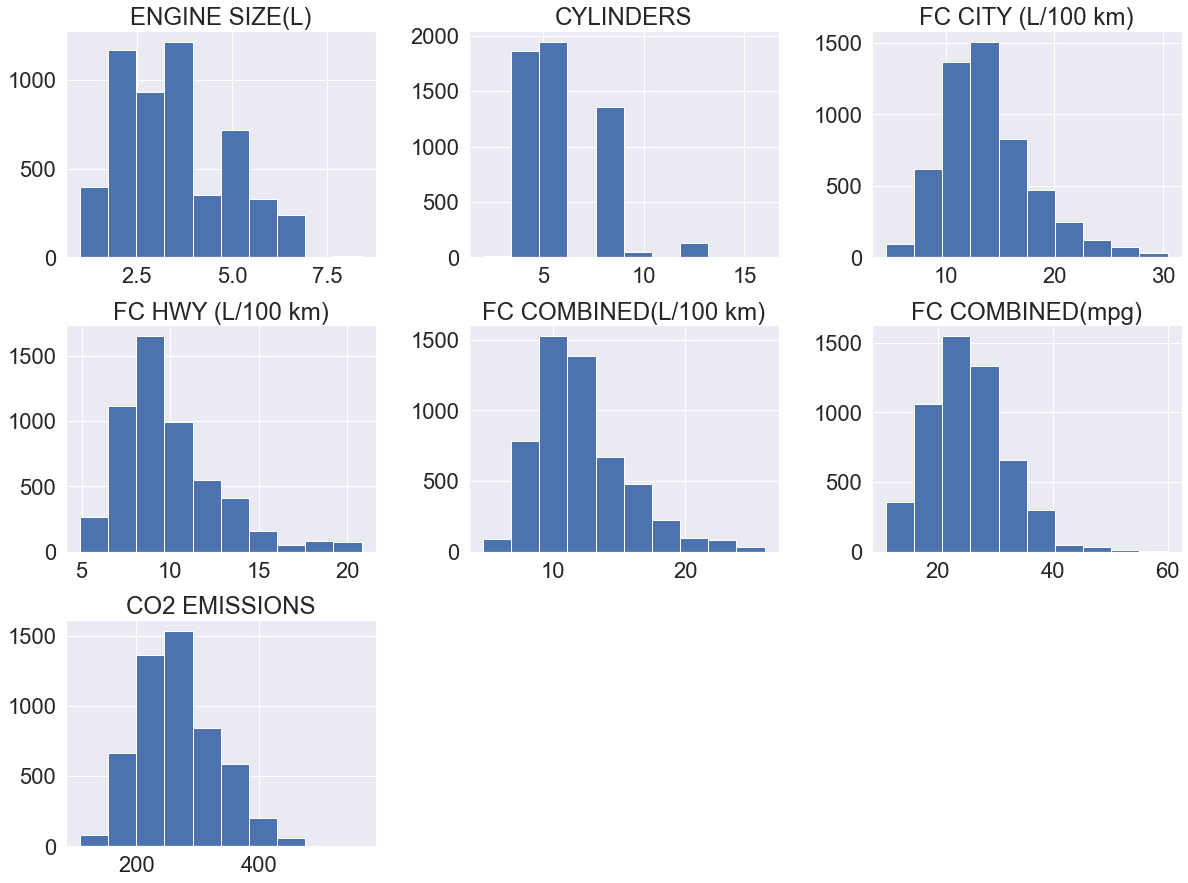

In [213]:
#check distribution
plt.figure(dpi=200);
df.hist(figsize = (20,15));
plt.show();

#### Observations
The distribution for CYLINDERS appears to be descrete.
The distribution for FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY and FUELCONSUMPTION_COMB appears to be right skewed. This can also be confirmed by looking at the mean
and median.

<AxesSubplot:>

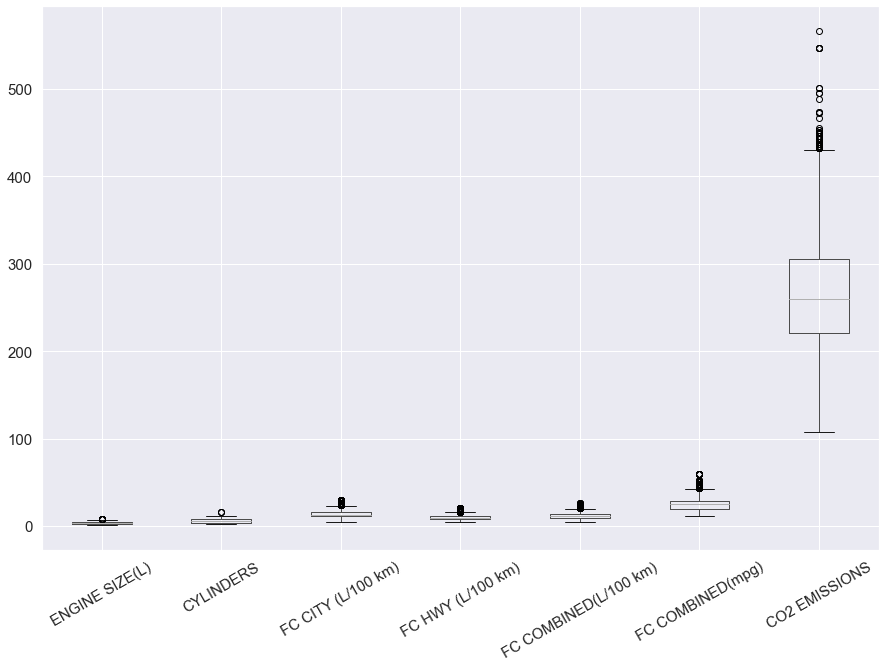

In [214]:
#check fo ouliers
df.boxplot(figsize = (15,10), fontsize = 15, rot = 30)

Observations
- There are outliers in the data that needs to be treated
- Some variable exerts dominace over others and this will need to be standardixe or normalized

In [215]:
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

### UNIVARIATE ANALYSIS

In [216]:
# defining the dependent and independent variables
df_num = df.select_dtypes(exclude ='object') # obtains the numerical data ty
df_num = treat_outliers_all(df_num, df_num)

In [217]:
object_df = df.select_dtypes(include ='object')

<AxesSubplot:>

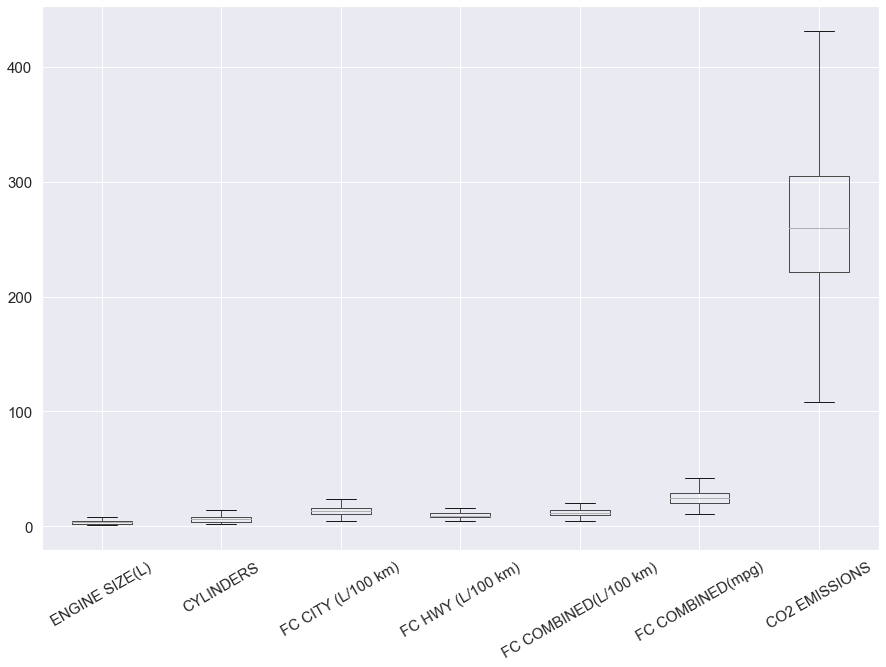

In [218]:
#checking if outliers has ben treated
df_num.boxplot(figsize = (15,10), fontsize = 15, rot = 30)

C:\Users\DELL\AppData\Local\Temp/ipykernel_9584/2149835865.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


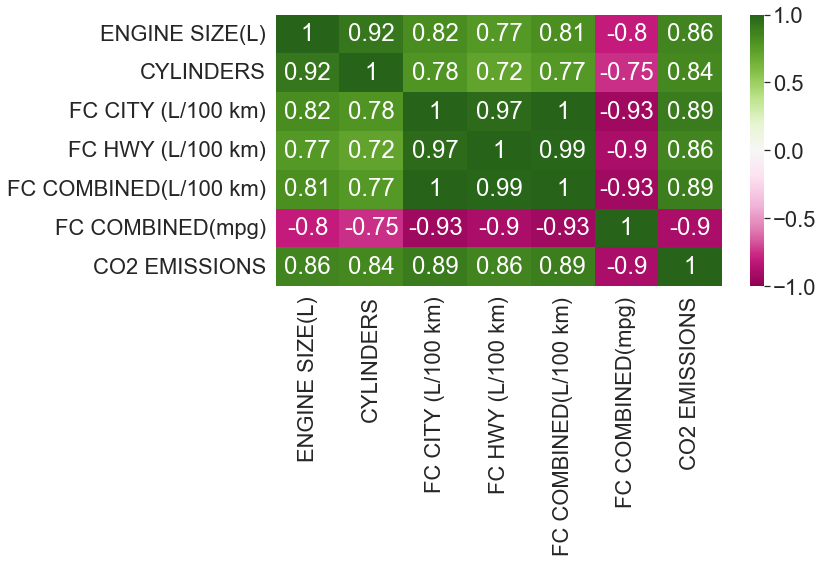

In [219]:
#checking for coreelation
plt.figure(figsize=(10,5))
corr_mat = df.corr()
sns.heatmap(data=corr_mat, annot = True, vmin=-1, cmap = "PiYG");

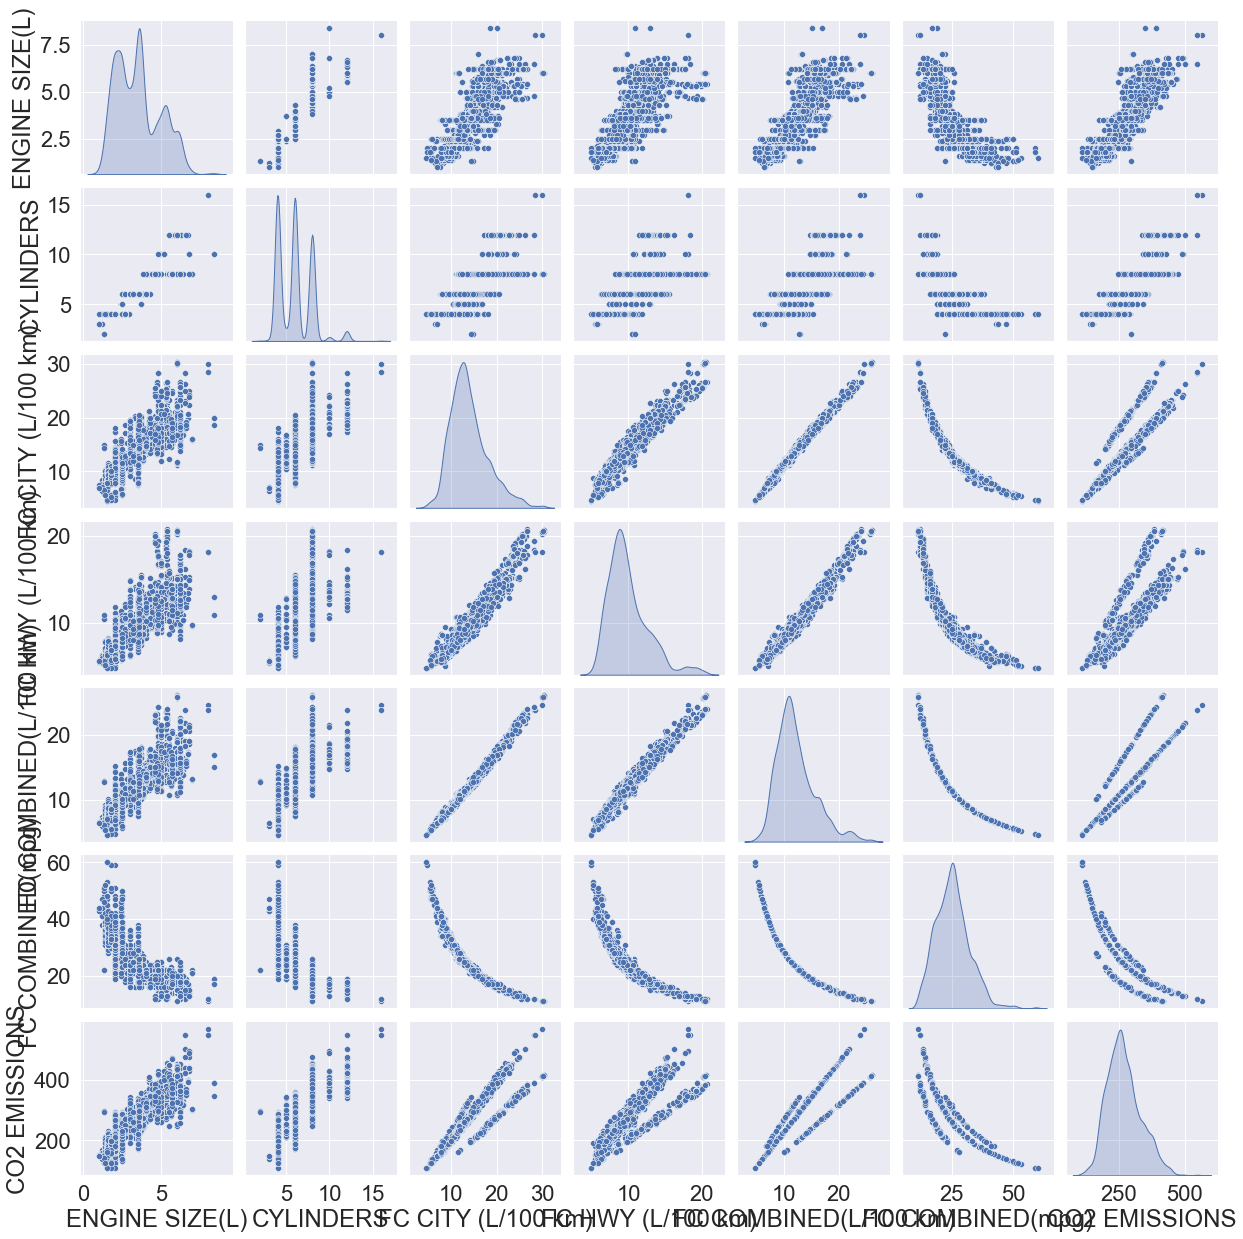

In [220]:
sns.pairplot(data=df, diag_kind='kde')

 ### Linear Model Building

- We want to predict the C02 Emission.

- We'll be using all numerical continous variable

- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

- We will build a Linear Regression model using the train data and then check it's performance.

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X = df_num.drop(['CO2 EMISSIONS'], axis= 1)
Y = df_num['CO2 EMISSIONS']

In [223]:
#Split into train, test and validation()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #traintest split
X,Y=X_train,Y_train

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1) #train validation split

In [224]:
print("Number of rows in test data =", X_test.shape[0])
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])

Number of rows in test data = 1072
Number of rows in train data = 3429
Number of rows in validation data = 858


In [225]:
len(df)

5359

### Scaling the data
- The two most common scaller is minmax scaler and  standard scaler
- since this is a linear regression problem. Standardiztion will be the best option

- Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

- Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis

#ref:https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Normalization%20is%20useful%20when%20your,Gaussian%20(bell%20curve)%20distribution.

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
#standardize
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [228]:
#fit training data
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, Y_train)

LinearRegression()

### Check Model Performance

In [229]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# # function to compute MAPE
# def mape_score(targets, predictions):
#     return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
#     mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2
        },
        index=[0],
    )

    return df_perf

In [230]:
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [231]:
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, X_train_scaled, Y_train)
lin_reg_model_perf_train

RMSE        MAE  R-squared  Adj. R-squared
0  21.781643  14.348397   0.881147        0.880938

In [232]:
# Checking model performance on test set
lin_reg_model_perf_test = model_performance_regression(lin_reg_model, X_test_scaled, Y_test)
lin_reg_model_perf_test

RMSE        MAE  R-squared  Adj. R-squared
0  20.793918  13.916606   0.893796        0.893198

In [233]:
lin_reg_model_perf_val = model_performance_regression(lin_reg_model, X_val_scaled, Y_val)
lin_reg_model_perf_val

RMSE        MAE  R-squared  Adj. R-squared
0  22.000834  14.593399   0.879922        0.879075

In [234]:
print('Training performance')
print(lin_reg_model_perf_train)
print('')
print('Test performance')
print(lin_reg_model_perf_test)
print('')
print('validation performance')
print(lin_reg_model_perf_val)

Training performance
        RMSE        MAE  R-squared  Adj. R-squared
0  21.781643  14.348397   0.881147        0.880938

Test performance
        RMSE        MAE  R-squared  Adj. R-squared
0  20.793918  13.916606   0.893796        0.893198

validation performance
        RMSE        MAE  R-squared  Adj. R-squared
0  22.000834  14.593399   0.879922        0.879075


#### Performance Improvement

The model underfits i.e not performing well

There major reason for this might be because the model isnt complex enough

will be adding more variables to make the model more complex

In [235]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [236]:
ohe = OneHotEncoder() # declares an instance of the object
ohe_dat=ohe.fit_transform(object_df[['FUEL TYPE']]).toarray() # applies the object to data
feature_labels = ohe.categories_ # the labels are stored here
feature_labels = np.array(feature_labels).ravel()
df_ohe = pd.DataFrame(ohe_dat, columns = feature_labels ) # creating a dataframe for the ohe variable
df_ohe_new = pd.concat([df_num,df_ohe], axis = 1) # combining the original dataframe (df) and df_ohe
df_ohe_new

ENGINE SIZE(L)  CYLINDERS  FC CITY (L/100 km)  FC HWY (L/100 km)  \
0                2.0        4.0                10.9                7.8   
1                2.0        4.0                10.0                7.6   
2                2.0        4.0                11.6                8.1   
3                3.7        6.0                14.8               11.3   
4                2.3        4.0                13.2               10.3   
...              ...        ...                 ...                ...   
5354             3.0        6.0                13.4                9.8   
5355             3.2        6.0                13.2                9.5   
5356             3.0        6.0                13.4                9.8   
5357             3.2        6.0                12.9                9.3   
5358             3.2        6.0                14.9               10.2   

      FC COMBINED(L/100 km)  FC COMBINED(mpg)  CO2 EMISSIONS    D    E    X  \
0                       9.5              30.0            219  0.0  0.0  1.0   
1                       8.9              32.0            205  0.0  0.0  1.0   
2                      10.0              28.0            230  0.0  0.0  0.0   
3                      13.2              21.0            304  0.0  0.0  0.0   
4                      11.9              24.0            274  0.0  0.0  0.0   
...                     ...               ...            ...  ...  ...  ...   
5354                   11.8              24.0            271  0.0  0.0  1.0   
5355                   11.5              25.0            264  0.0  0.0  1.0   
5356                   11.8              24.0            271  0.0  0.0  1.0   
5357                   11.3              25.0            260  0.0  0.0  1.0   
5358                   12.8              22.0            294  0.0  0.0  1.0   

        Z  
0     0.0  
1     0.0  
2     1.0  
3     1.0  
4     1.0  
...   ...  
5354  0.0  
5355  0.0  
5356  0.0  
5357  0.0  
5358  0.0  

[5359 rows x 11 columns]

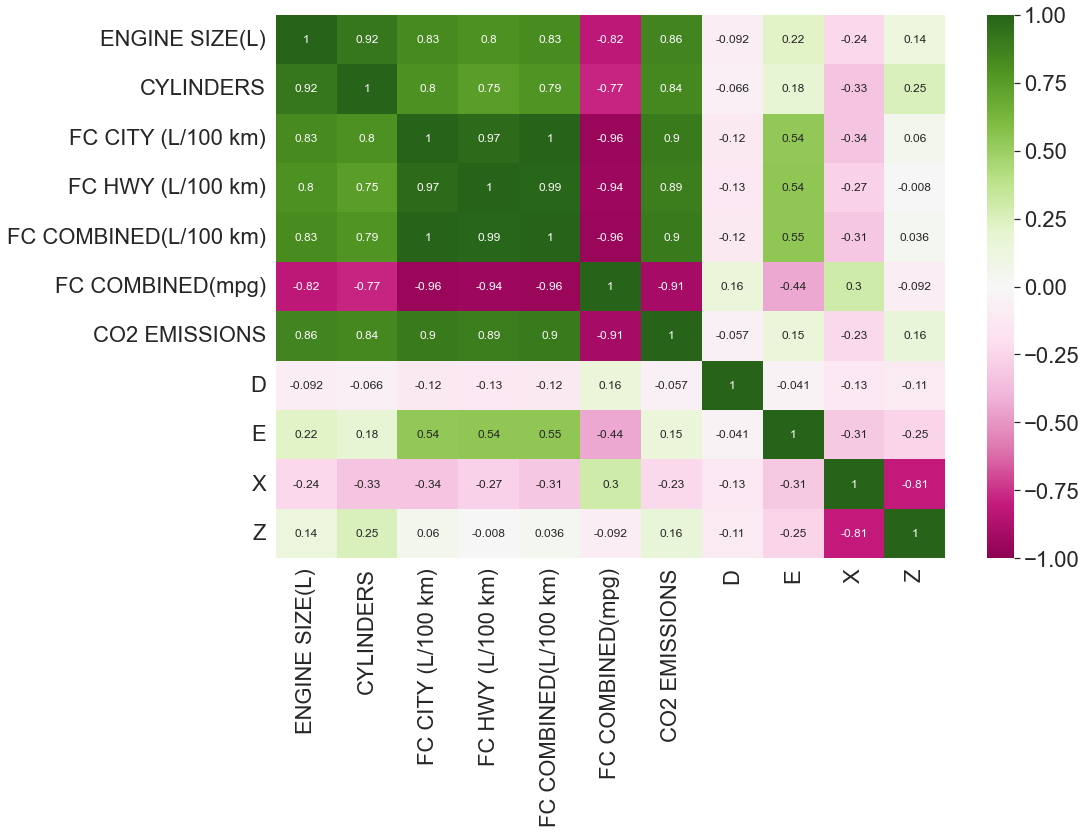

In [269]:
plt.figure(figsize=(15,10))
corr_mat = df_ohe_new.corr()
sns.heatmap(data=corr_mat, annot = True, vmin=-1, cmap = "PiYG", annot_kws={"fontsize":12});
#plt.subplots_adjust(right=0.8, left=0.2)
plt.savefig('Correlation Fuel type')

In [238]:
df2 = df_ohe_new.drop(['D'], axis = 1)
#very low correclation

In [239]:
X2 = df2.drop(['CO2 EMISSIONS'], axis= 1)
Y2 = df2['CO2 EMISSIONS']

In [240]:
#Split into train, test and validation()

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=1) #traintest split
X2,Y2=X2_train,Y2_train

X2_train, X2_val, Y2_train, Y2_val = train_test_split(X2, Y2, test_size=0.2, random_state=1) #train validation split

In [241]:
#fit training data
#standardize
scaler = StandardScaler()

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)
X2_val_scaled = scaler.transform(X2_val)

In [242]:
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X2_train_scaled, Y2_train)

LinearRegression()

In [243]:
lin_reg_model_perf_train = model_performance_regression(lin_reg_model2, X2_train_scaled, Y2_train)
lin_reg_model_perf_train

RMSE       MAE  R-squared  Adj. R-squared
0  5.938368  2.637949   0.991166        0.991143

In [244]:
lin_reg_model_perf_test = model_performance_regression(lin_reg_model2, X2_test_scaled, Y2_test)
lin_reg_model_perf_test

RMSE       MAE  R-squared  Adj. R-squared
0  5.685384  2.527795   0.992061        0.991993

In [245]:
lin_reg_model_perf_val = model_performance_regression(lin_reg_model2, X2_val_scaled, Y2_val)
lin_reg_model_perf_val

RMSE       MAE  R-squared  Adj. R-squared
0  5.719594  2.468818   0.991884        0.991798

In [246]:
print('Training performance')
print(lin_reg_model_perf_train)
print('')
print('Test performance')
print(lin_reg_model_perf_test)
print('')
print('validation performance')
print(lin_reg_model_perf_val)

Training performance
       RMSE       MAE  R-squared  Adj. R-squared
0  5.938368  2.637949   0.991166        0.991143

Test performance
       RMSE       MAE  R-squared  Adj. R-squared
0  5.685384  2.527795   0.992061        0.991993

validation performance
       RMSE       MAE  R-squared  Adj. R-squared
0  5.719594  2.468818   0.991884        0.991798


#### Question 3

Determine whether there were any noticeable improvements in  the CO2 emission from year 2010 to year 2014

In [247]:
#df['MODEL YEAR']= df['MODEL YEAR'].astype('int')

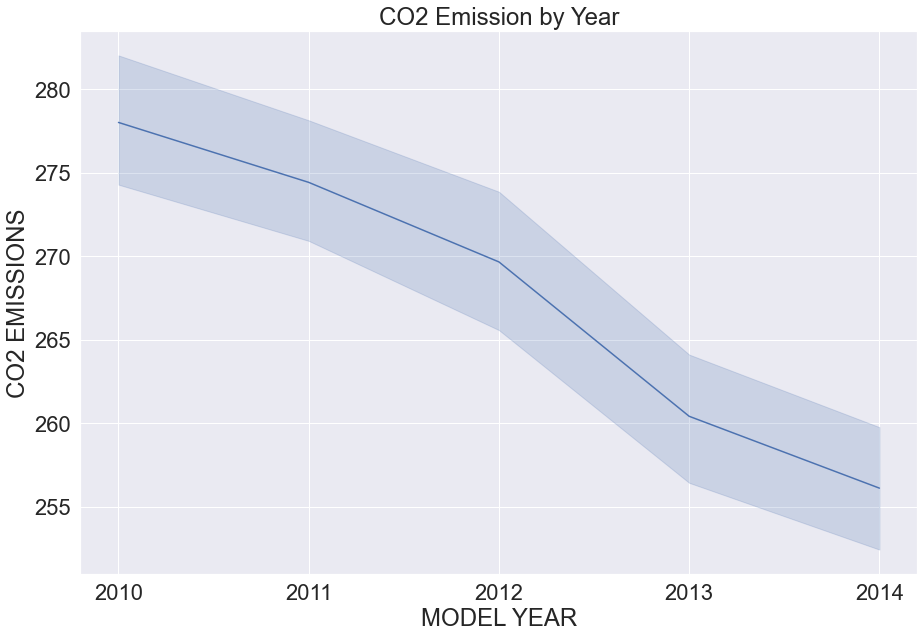

In [248]:
sns.lineplot(data=df, x ='MODEL YEAR', y='CO2 EMISSIONS');
plt.title('CO2 Emission by Year');
plt.savefig('Yearly CO2 Emissions')

#### There's constant reduction in fuel consumption from 2012 to 2014

### Question 4

#### Using  each  categorical  variable  as  the  target  variable  at  each  instance,  determine which  of  the  variables  performed  best  in  classifying  the  dataset.

#### Cross Validation

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # SVC: support vector classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score,precision_score, recall_score,f1_score,precision_recall_curve,
                             classification_report,confusion_matrix, ConfusionMatrixDisplay, roc_curve,roc_auc_score)

In [255]:
# Appending several models for cross validation
models = []
models.append(("LR",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("SVC",SVC()))
models.append(("RF",RandomForestClassifier()))
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('Dtree', DecisionTreeClassifier()),
 ('SVC', SVC()),
 ('RF', RandomForestClassifier())]

In [259]:
def report_cross_val_score(models):
    for name,model in models:
        kfold = KFold(n_splits=5)
        cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
        #print(name, cv_result.mean())
        print(name, cv_result)


report_cross_val_score(models)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LR [0.1180758  0.14431487 0.14723032 0.13994169 0.14744526]
KNN [0.60058309 0.63994169 0.62536443 0.62973761 0.65985401]
Dtree [0.93731778 0.93294461 0.93148688 0.94314869 0.95036496]
SVC [0.08746356 0.07725948 0.1180758  0.09183673 0.06569343]
RF [0.90087464 0.91253644 0.90816327 0.9212828  0.93576642]


In [260]:
# The model test report
def report_model_test(models):
    for name,model in models:
        model.fit(X_train_scaled,Y_train)
        basem_preds = model.predict(X_test_scaled)
        print(name)
        print(classification_report(Y_test,basem_preds))
        ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, Y_test)
        #plt.show()
        plt.figure(figsize=(40,40), dpi = 200);


report_model_test(models)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

LR
              precision    recall  f1-score   support

         108       0.00      0.00      0.00         1
         110       0.00      0.00      0.00         3
         126       0.00      0.00      0.00         1
         127       0.00      0.00      0.00         1
         131       0.00      0.00      0.00         0
         136       0.00      0.00      0.00         3
         138       0.00      0.00      0.00         3
         143       0.00      0.00      0.00         1
         145       0.00      0.00      0.00         1
         147       0.00      0.00      0.00         6
         150       0.00      0.00      0.00         1
         152       0.00      0.00      0.00         1
         159       0.11      1.00      0.20         1
         161       0.00      0.00      0.00         1
         163       0.00      0.00      0.00         2
         166       0.00      0.00      0.00         3
         168       0.00      0.00      0.00         5
         170       0.00 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classif

Dtree
              precision    recall  f1-score   support

         108       1.00      1.00      1.00         1
         110       1.00      1.00      1.00         3
         126       1.00      1.00      1.00         1
         127       1.00      1.00      1.00         1
         136       1.00      1.00      1.00         3
         138       1.00      1.00      1.00         3
         143       1.00      1.00      1.00         1
         145       1.00      1.00      1.00         1
         147       1.00      1.00      1.00         6
         150       1.00      1.00      1.00         1
         152       1.00      1.00      1.00         1
         159       1.00      1.00      1.00         1
         161       1.00      1.00      1.00         1
         162       0.00      0.00      0.00         0
         163       1.00      1.00      1.00         2
         166       0.75      1.00      0.86         3
         168       1.00      0.80      0.89         5
         170       1.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classif

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

#### Decision Tree

In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [263]:
le = LabelEncoder()# declares an instance of the object
le_data = object_df.apply(le.fit_transform)# applies the object to data
df_le = pd.DataFrame(le_data) # creates a dataframe
new_df_le = pd.concat([df_num,df_le], axis = 1)
new_df_le.head(5)

ENGINE SIZE(L)  CYLINDERS  FC CITY (L/100 km)  FC HWY (L/100 km)  \
0             2.0        4.0                10.9                7.8   
1             2.0        4.0                10.0                7.6   
2             2.0        4.0                11.6                8.1   
3             3.7        6.0                14.8               11.3   
4             2.3        4.0                13.2               10.3   

   FC COMBINED(L/100 km)  FC COMBINED(mpg)  CO2 EMISSIONS  MODEL YEAR  MAKE  \
0                    9.5              30.0            219           0     0   
1                    8.9              32.0            205           0     0   
2                   10.0              28.0            230           0     0   
3                   13.2              21.0            304           0     0   
4                   11.9              24.0            274           0     0   

   MODEL  VEHICLE CLASS  TRANSMISSION  FUEL TYPE  
0    352              0            10          2  
1    352              0            19          2  
2    352              0            20          3  
3    734             11            11          3  
4    884             11            10          3

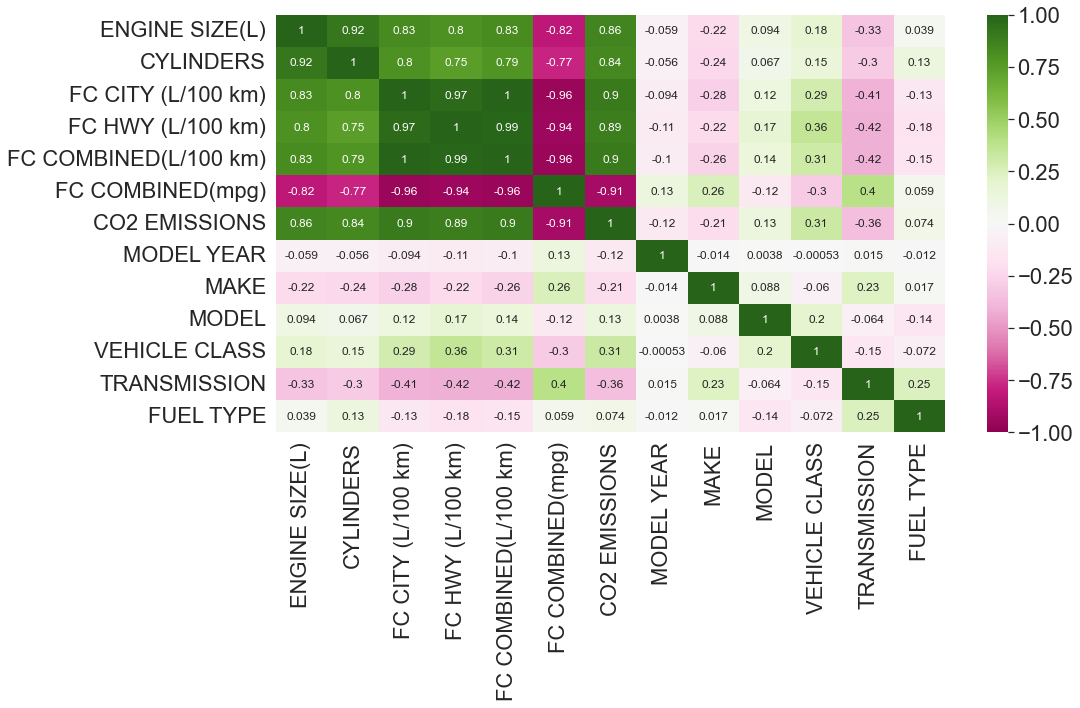

In [268]:
plt.figure(figsize=(15,10))
corr_mat = new_df_le.corr()
plt.subplots_adjust(bottom = 0.3)
sns.heatmap(data=corr_mat, annot = True, vmin=-1, cmap = "PiYG", annot_kws={"fontsize":12});
plt.savefig(' All Corr Matt')

In [270]:
new_df_le =new_df_le.drop(['MODEL YEAR', 'MODEL'], axis = 1)

In [273]:
plt.figure(figsize=(15,10))
corr_mat = new_df_le.corr()
sns.heatmap(data=corr_mat, annot = True, vmin=-1, cmap = "PiYG");

<Figure size 1080x720 with 0 Axes>

In [275]:
def report_model(model, predictor, target):
    preds = model.predict(predictor)

    feature_importance=pd.DataFrame(data=model.feature_importances_, index =predictor.columns,
    columns = ['Feature_importance']).sort_values('Feature_importance')
    print(feature_importance)
    print(classification_report(target,preds))
    plt.rcParams["figure.figsize"] = (15,10)
    ConfusionMatrixDisplay.from_estimator(model,predictor, target)

    #plt.show()
    plot_tree(model, feature_names = predictor.columns, filled = True, fontsize=20 );

In [276]:
model = DecisionTreeClassifier()

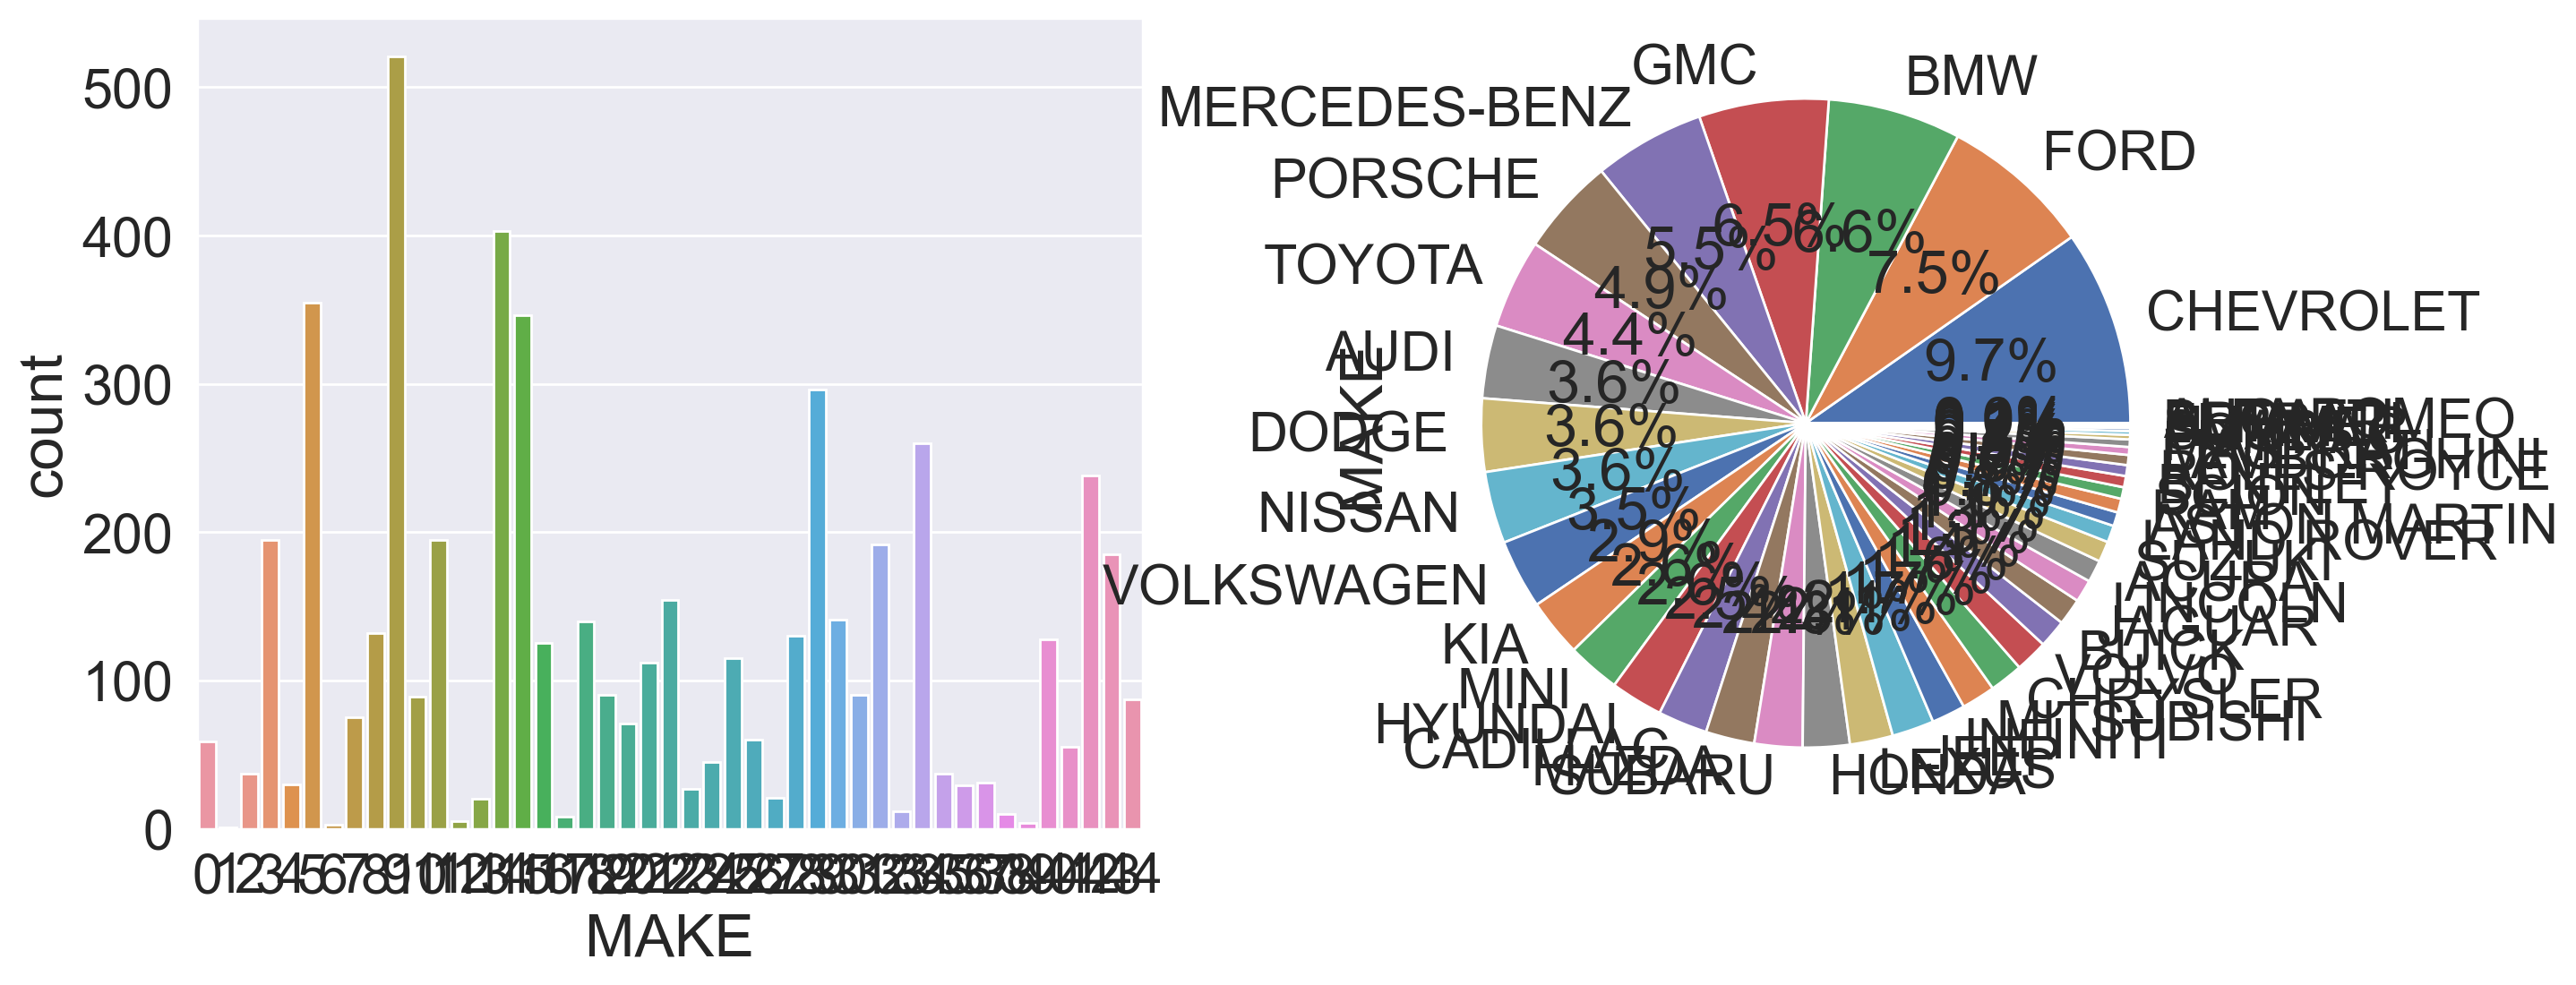

In [277]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting
a = sns.countplot(x='MAKE', data=new_df_le, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0
a= df['MAKE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1


In [278]:
#using 'MAKE' as target
x = new_df_le.drop(['MAKE','VEHICLE CLASS','FUEL TYPE'], axis=1)
y = new_df_le['MAKE']

In [279]:
from imblearn.over_sampling import RandomOverSampler

In [280]:
from imblearn.over_sampling import SMOTE
sm = RandomOverSampler(random_state=42) # The object is created
x_res, y_res = sm.fit_resample(x, y) # The object is applied
x, y = x_res, y_res # reassigning the balanced dataset to X,y

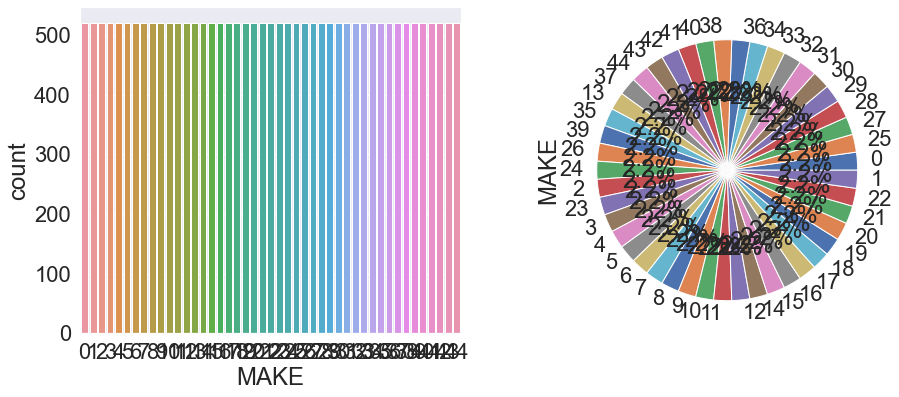

In [281]:
# Plot of the dataset
df_bal = pd.concat([x_res,y_res], axis = 1) # creating a dataframe for the balanced data
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='MAKE',data=df_bal, ax=ax[0]) # assigning each of the plot to the axis shell
a= df_bal['MAKE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning each of the plot to the axis shell

In [282]:
#Split into train, test and validation()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) #traintest split
x,y=x_train,y_train

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1) #train validation split

In [283]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [284]:
report_model(model, x_train, y_train)

                       Feature_importance
FC COMBINED(mpg)                 0.025741
FC COMBINED(L/100 km)            0.048738
CYLINDERS                        0.056252
CO2 EMISSIONS                    0.093156
FC HWY (L/100 km)                0.138598
FC CITY (L/100 km)               0.141863
TRANSMISSION                     0.185891
ENGINE SIZE(L)                   0.309760
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       321
           1       1.00      1.00      1.00       340
           2       1.00      1.00      1.00       327
           3       0.99      0.97      0.98       326
           4       1.00      1.00      1.00       330
           5       1.00      1.00      1.00       340
           6       1.00      1.00      1.00       327
           7       0.93      1.00      0.96       338
           8       0.91      0.94      0.92       335
           9       0.73      0.60      0.66       339
          10       0.75    

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

In [285]:
report_model(model, x_test, y_test)

                       Feature_importance
FC COMBINED(mpg)                 0.025741
FC COMBINED(L/100 km)            0.048738
CYLINDERS                        0.056252
CO2 EMISSIONS                    0.093156
FC HWY (L/100 km)                0.138598
FC CITY (L/100 km)               0.141863
TRANSMISSION                     0.185891
ENGINE SIZE(L)                   0.309760
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       121
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       110
           3       0.97      0.96      0.97       109
           4       0.98      1.00      0.99       107
           5       0.99      0.93      0.96       101
           6       1.00      1.00      1.00       111
           7       0.92      1.00      0.96       103
           8       0.91      0.97      0.94       100
           9       0.49      0.44      0.46       103
          10       0.70    


KeyboardInterrupt



Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

In [286]:
report_model(model, x_val, y_val)

                       Feature_importance
FC COMBINED(mpg)                 0.025741
FC COMBINED(L/100 km)            0.048738
CYLINDERS                        0.056252
CO2 EMISSIONS                    0.093156
FC HWY (L/100 km)                0.138598
FC CITY (L/100 km)               0.141863
TRANSMISSION                     0.185891
ENGINE SIZE(L)                   0.309760
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        79
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        84
           3       0.94      0.90      0.92        86
           4       0.98      1.00      0.99        84
           5       1.00      0.90      0.95        80
           6       1.00      1.00      1.00        83
           7       0.96      1.00      0.98        80
           8       0.93      0.94      0.94        86
           9       0.42      0.42      0.42        79
          10       0.68    


KeyboardInterrupt



Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

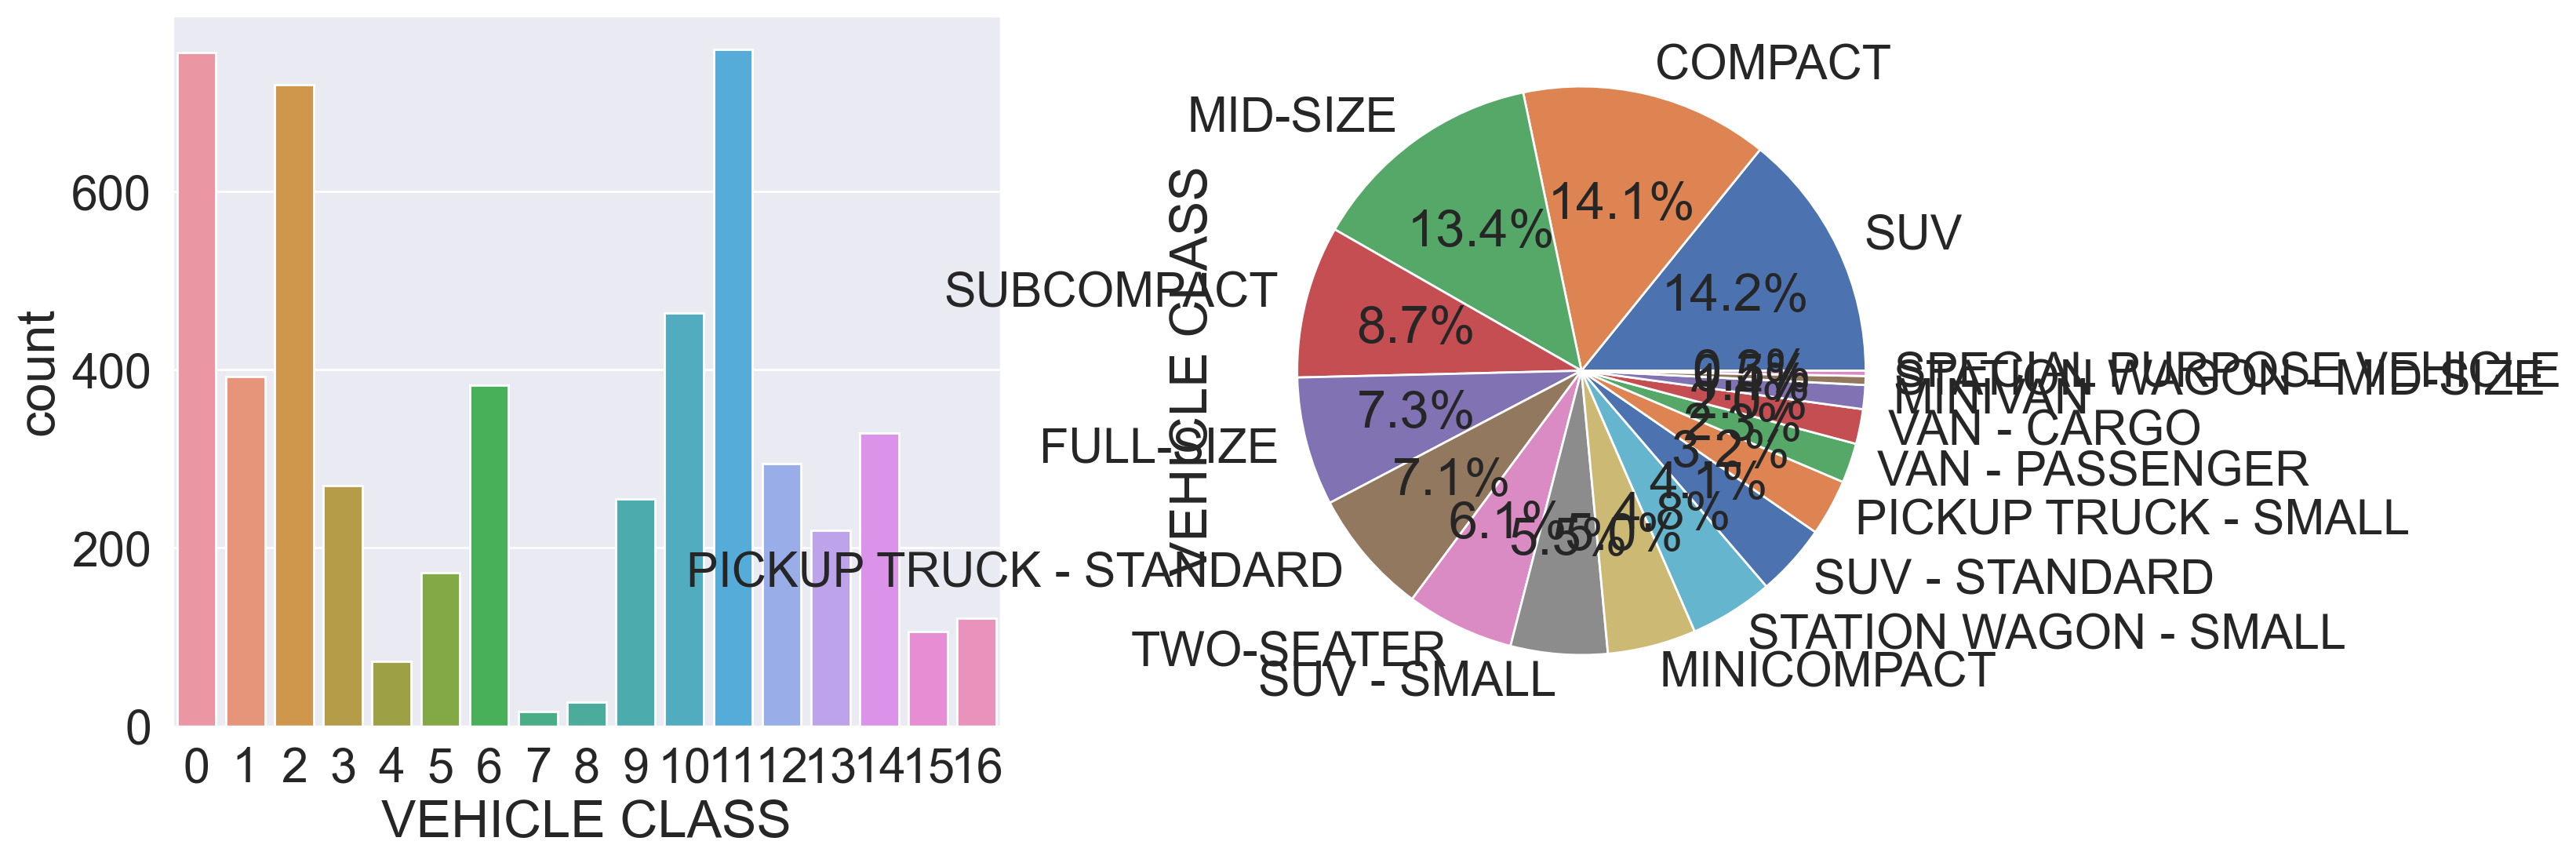

In [287]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting
a = sns.countplot(x='VEHICLE CLASS', data=new_df_le, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0
a= df['VEHICLE CLASS'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1

In [288]:
#using VEHICLE CLASS as target
x2 = new_df_le.drop(['TRANSMISSION', 'CYLINDERS', 'ENGINE SIZE(L)', 'VEHICLE CLASS', 'FUEL TYPE', 'MAKE'], axis=1)
y2= new_df_le['VEHICLE CLASS']

In [289]:
sm = RandomOverSampler(random_state=42) # The object is created
x2_res, y2_res = sm.fit_resample(x2, y2) # The object is applied
x2, y2 = x2_res, y2_res # reassigning the balanced dataset to X,y

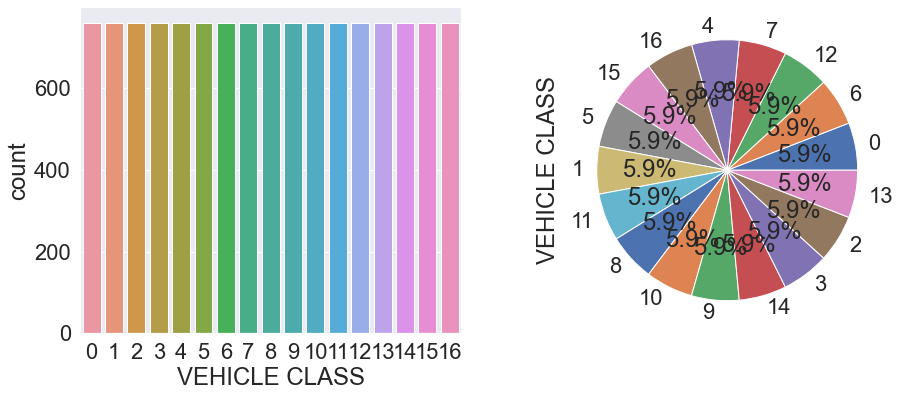

In [290]:
# Plot of the dataset
df_bal = pd.concat([x2_res,y2_res], axis = 1) # creating a dataframe for the balanced data
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='VEHICLE CLASS',data=df_bal, ax=ax[0]) # assigning each of the plot to the axis shell
a= df_bal['VEHICLE CLASS'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning each of the plot to the axis shell

In [291]:
#Split into train, test and validation()
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=1) #traintest split
x2,y2=x2_train,y2_train

x2_train, x2_val, y2_train, y2_val = train_test_split(x2, y2, test_size=0.2, random_state=1) #train validation split

In [292]:
model.fit(x2_train, y2_train)

DecisionTreeClassifier()

In [293]:
report_model(model, x2_train, y2_train)

                       Feature_importance
FC COMBINED(mpg)                 0.013957
FC COMBINED(L/100 km)            0.124656
CO2 EMISSIONS                    0.194284
FC CITY (L/100 km)               0.329241
FC HWY (L/100 km)                0.337861
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       483
           1       0.81      0.85      0.83       474
           2       0.83      0.66      0.73       466
           3       0.69      0.75      0.72       498
           4       0.88      0.96      0.92       493
           5       0.85      0.98      0.91       503
           6       0.85      0.83      0.84       467
           7       0.95      1.00      0.97       470
           8       0.85      1.00      0.92       484
           9       0.72      0.85      0.78       497
          10       0.76      0.59      0.67       498
          11       0.85      0.52      0.64       484
          12       0.75      0.72      0.73  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp/ipykernel_9584/65495087.py", line 1, in <module>
    report_model(model, x2_train, y2_train)
  File "C:\Users\DELL\AppData\Local\Temp/ipykernel_9584/3731798496.py", line 12, in report_model
    plot_tree(model, feature_names = predictor.columns, filled = True, fontsize=20 );
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 194, in plot_tree
    return exporter.export(decision_tree, ax=ax)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 668, in export
    self.recurse(draw_tree, decision_tree.tree_, ax, max_x, max_y)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 729, in recurse
    self.recurse(child, tree, ax, max_x, max_y, depth=depth + 1)
  File "C:\Us


KeyboardInterrupt



Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

In [ ]:
report_model(model, x2_test, y2_test)

                       Feature_importance
FC COMBINED(mpg)                 0.013957
FC COMBINED(L/100 km)            0.124656
CO2 EMISSIONS                    0.194284
FC CITY (L/100 km)               0.329241
FC HWY (L/100 km)                0.337861
              precision    recall  f1-score   support

           0       0.47      0.40      0.44       161
           1       0.66      0.79      0.72       168
           2       0.68      0.42      0.52       176
           3       0.61      0.79      0.69       140
           4       0.87      0.95      0.91       153
           5       0.78      0.98      0.87       132
           6       0.81      0.82      0.82       161
           7       0.94      1.00      0.97       166
           8       0.86      1.00      0.93       173
           9       0.63      0.77      0.69       131
          10       0.54      0.43      0.48       147
          11       0.57      0.36      0.44       159
          12       0.57      0.52      0.54  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp/ipykernel_9584/3965427189.py", line 1, in <module>
    report_model(model, x2_test, y2_test)
  File "C:\Users\DELL\AppData\Local\Temp/ipykernel_9584/3731798496.py", line 12, in report_model
    plot_tree(model, feature_names = predictor.columns, filled = True, fontsize=20 );
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 194, in plot_tree
    return exporter.export(decision_tree, ax=ax)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 668, in export
    self.recurse(draw_tree, decision_tree.tree_, ax, max_x, max_y)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 729, in recurse
    self.recurse(child, tree, ax, max_x, max_y, depth=depth + 1)
  File "C:\Us

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp/ipykernel_9584/3965427189.py", line 1, in <module>
    report_model(model, x2_test, y2_test)
  File "C:\Users\DELL\AppData\Local\Temp/ipykernel_9584/3731798496.py", line 12, in report_model
    plot_tree(model, feature_names = predictor.columns, filled = True, fontsize=20 );
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 194, in plot_tree
    return exporter.export(decision_tree, ax=ax)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 668, in export
    self.recurse(draw_tree, decision_tree.tree_, ax, max_x, max_y)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 729, in recurse
    self.recurse(child, tree, ax, max_x, max_y, depth=depth + 1)
  File "C:\Us

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp/ipykernel_9584/3965427189.py", line 1, in <module>
    report_model(model, x2_test, y2_test)
  File "C:\Users\DELL\AppData\Local\Temp/ipykernel_9584/3731798496.py", line 12, in report_model
    plot_tree(model, feature_names = predictor.columns, filled = True, fontsize=20 );
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 194, in plot_tree
    return exporter.export(decision_tree, ax=ax)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 668, in export
    self.recurse(draw_tree, decision_tree.tree_, ax, max_x, max_y)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_export.py", line 729, in recurse
    self.recurse(child, tree, ax, max_x, max_y, depth=depth + 1)
  File "C:\Us

In [294]:
report_model(model, x2_val, y2_val)

                       Feature_importance
FC COMBINED(mpg)                 0.013957
FC COMBINED(L/100 km)            0.124656
CO2 EMISSIONS                    0.194284
FC CITY (L/100 km)               0.329241
FC HWY (L/100 km)                0.337861
              precision    recall  f1-score   support

           0       0.45      0.39      0.42       116
           1       0.68      0.74      0.71       118
           2       0.56      0.42      0.48       118
           3       0.62      0.72      0.67       122
           4       0.86      0.94      0.90       114
           5       0.82      0.98      0.89       125
           6       0.81      0.75      0.78       132
           7       0.93      1.00      0.96       124
           8       0.80      1.00      0.89       103
           9       0.68      0.77      0.72       132
          10       0.45      0.37      0.41       115
          11       0.59      0.39      0.47       117
          12       0.66      0.57      0.61  

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000001A850093700>
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

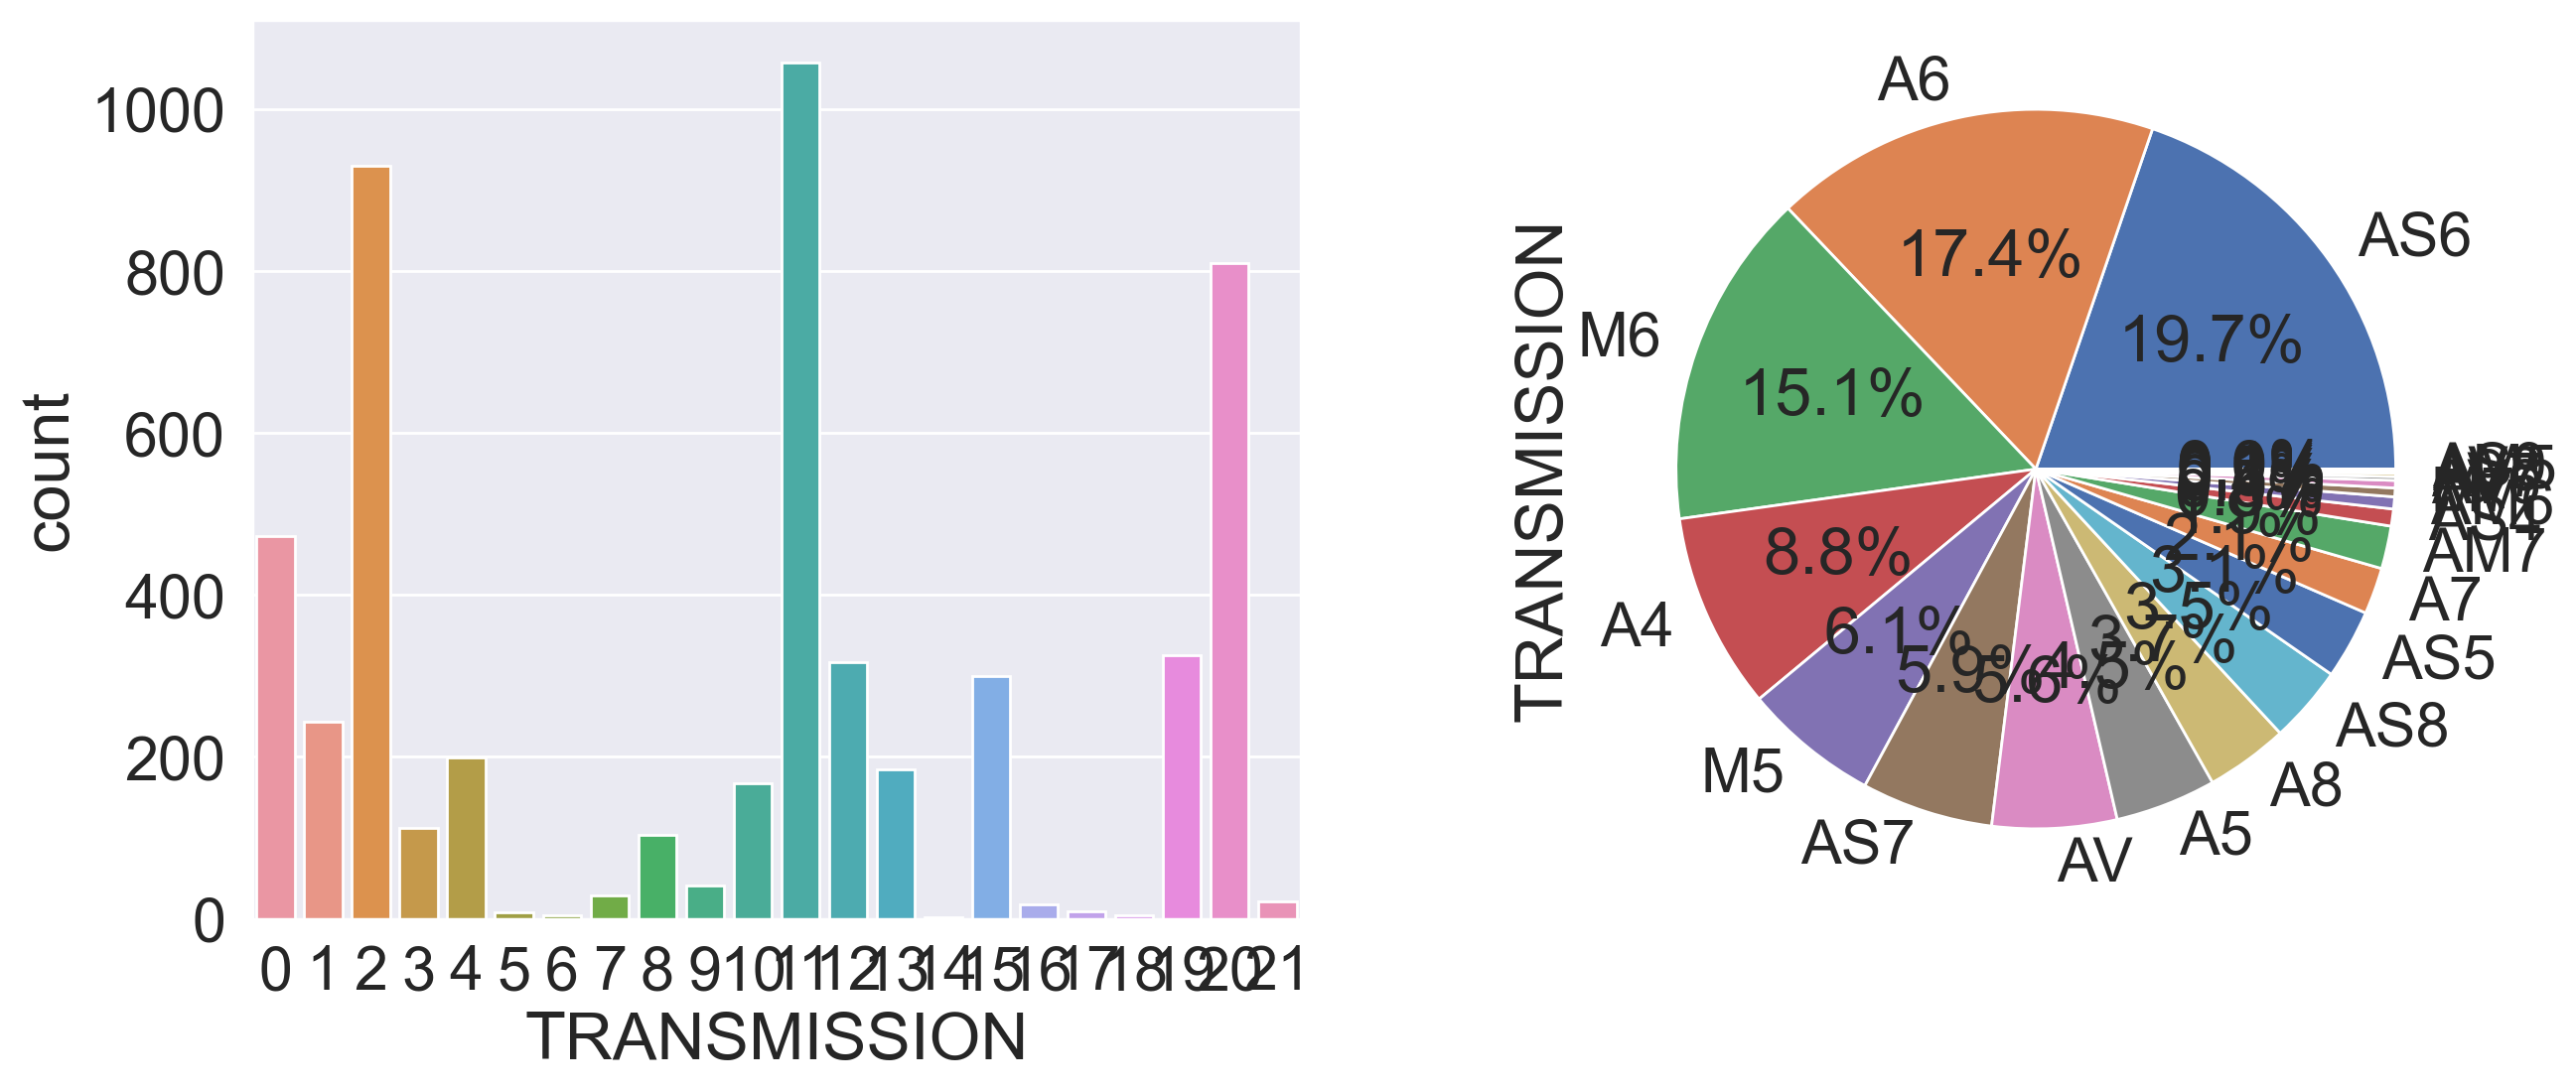

In [295]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting
a = sns.countplot(x='TRANSMISSION', data=new_df_le, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0
a= df['TRANSMISSION'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1

In [296]:
#using TRANSMISION as taerget
x3 = new_df_le.drop(['TRANSMISSION', 'VEHICLE CLASS'], axis=1)
y3= new_df_le['TRANSMISSION']

In [297]:
sm = RandomOverSampler(random_state=42) # The object is created
x3_res, y3_res = sm.fit_resample(x3, y3) # The object is applied
x3, y3 = x3_res, y3_res # reassigning the balanced dataset to X,y

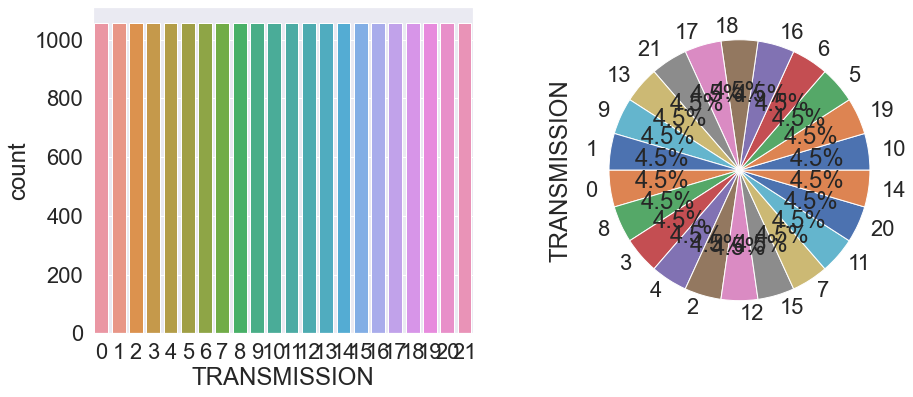

In [298]:
# Plot of the dataset
df_bal = pd.concat([x3_res,y3_res], axis = 1) # creating a dataframe for the balanced data
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='TRANSMISSION',data=df_bal, ax=ax[0]) # assigning each of the plot to the axis shell
a= df_bal['TRANSMISSION'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning each of the plot to the axis shell

In [299]:
#Split into train, test and validation()
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=1) #traintest split
x3,y3=x3_train,y3_train

x3_train, x3_val, y3_train, y3_val = train_test_split(x3, y3, test_size=0.2, random_state=1) #train validation split

In [300]:
model.fit(x3_train, y3_train)

DecisionTreeClassifier()

                       Feature_importance
FC COMBINED(mpg)                 0.020181
CYLINDERS                        0.023793
FUEL TYPE                        0.031239
FC COMBINED(L/100 km)            0.034083
CO2 EMISSIONS                    0.104435
FC CITY (L/100 km)               0.166390
FC HWY (L/100 km)                0.172613
ENGINE SIZE(L)                   0.190481
MAKE                             0.256786
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       642
           1       0.97      0.96      0.96       703
           2       0.96      0.98      0.97       684
           3       0.95      0.97      0.96       689
           4       0.99      0.99      0.99       684
           5       1.00      1.00      1.00       683
           6       0.98      1.00      0.99       687
           7       0.98      1.00      0.99       664
           8       0.94      0.96      0.95       691
           9       0.99      1.00      

KeyboardInterrupt: 

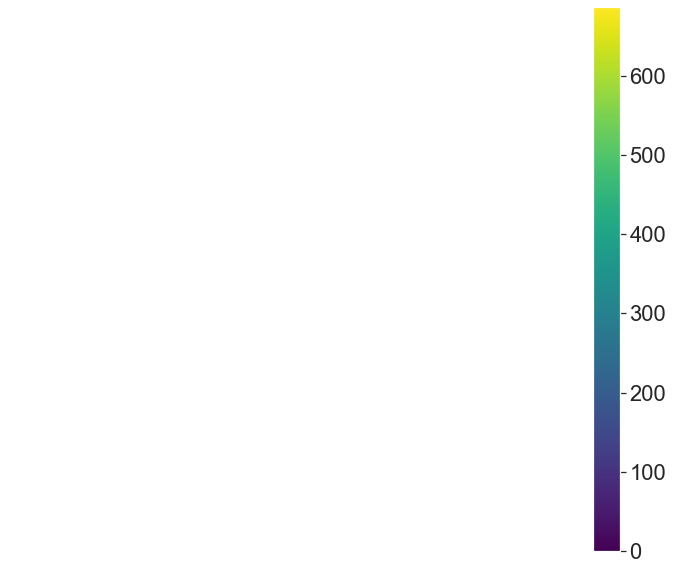

In [301]:
report_model(model, x3_train, y3_train)

In [302]:
report_model(model, x3_test, y3_test)

                       Feature_importance
FC COMBINED(mpg)                 0.020181
CYLINDERS                        0.023793
FUEL TYPE                        0.031239
FC COMBINED(L/100 km)            0.034083
CO2 EMISSIONS                    0.104435
FC CITY (L/100 km)               0.166390
FC HWY (L/100 km)                0.172613
ENGINE SIZE(L)                   0.190481
MAKE                             0.256786
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       238
           1       0.93      0.96      0.94       207
           2       0.84      0.82      0.83       209
           3       0.94      0.98      0.96       190
           4       0.97      0.99      0.98       220
           5       1.00      1.00      1.00       198
           6       0.99      1.00      1.00       204
           7       0.96      1.00      0.98       216
           8       0.95      0.94      0.94       219
           9       0.98      1.00      

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

In [303]:
report_model(model, x3_val, y3_val)

                       Feature_importance
FC COMBINED(mpg)                 0.020181
CYLINDERS                        0.023793
FUEL TYPE                        0.031239
FC COMBINED(L/100 km)            0.034083
CO2 EMISSIONS                    0.104435
FC CITY (L/100 km)               0.166390
FC HWY (L/100 km)                0.172613
ENGINE SIZE(L)                   0.190481
MAKE                             0.256786
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       178
           1       0.90      0.92      0.91       148
           2       0.83      0.86      0.84       165
           3       0.94      0.95      0.94       179
           4       0.98      0.99      0.99       154
           5       1.00      1.00      1.00       177
           6       0.99      1.00      0.99       167
           7       0.96      1.00      0.98       178
           8       0.92      0.95      0.93       148
           9       0.97      1.00      

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

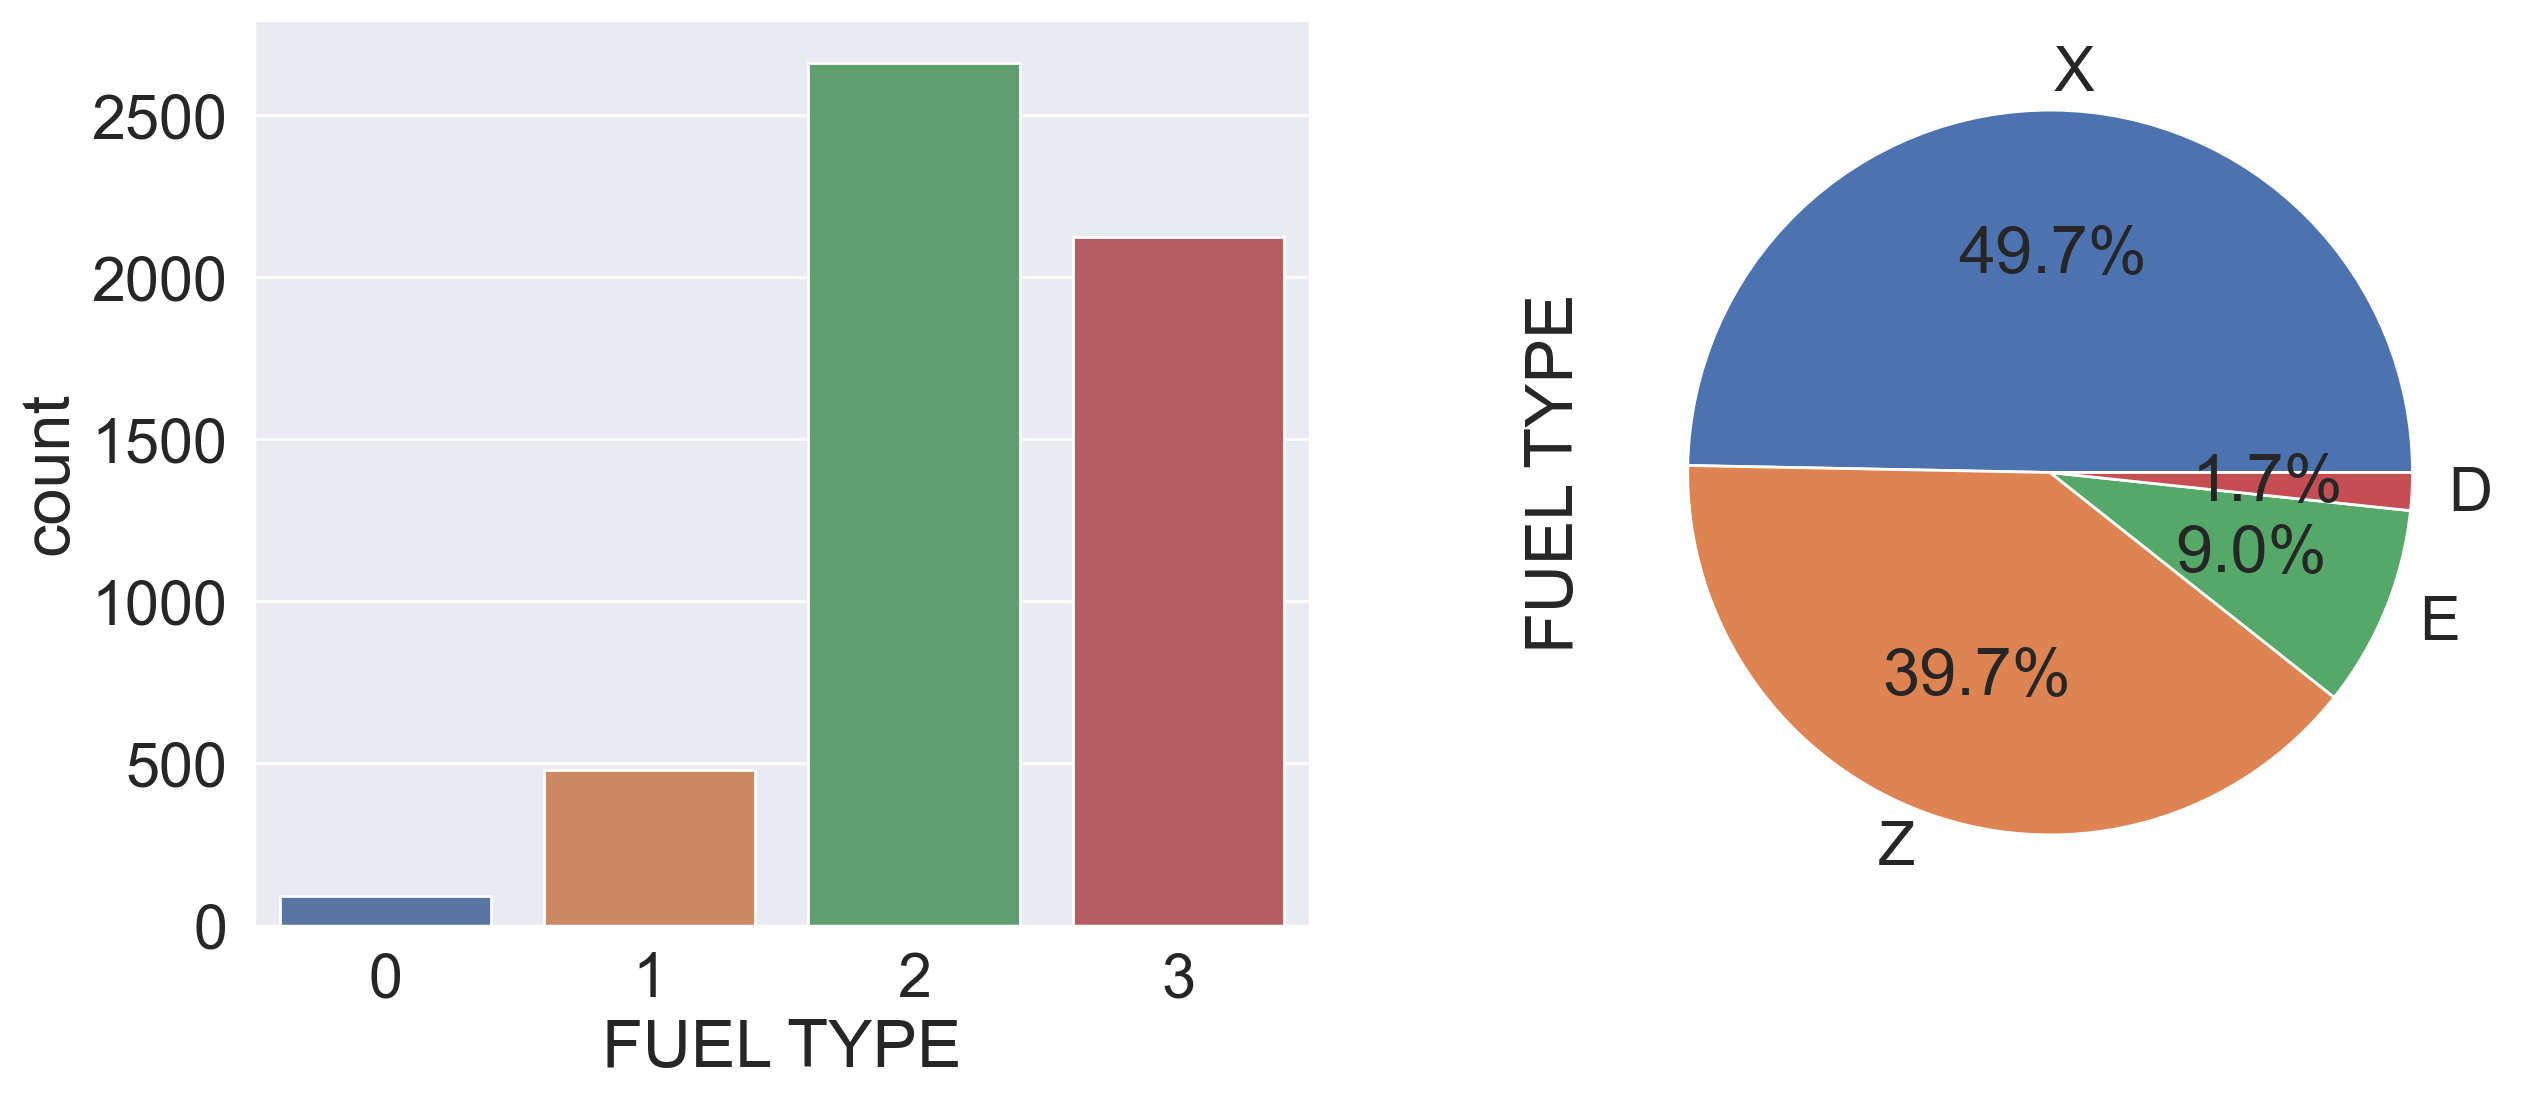

In [304]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting
a = sns.countplot(x='FUEL TYPE', data=new_df_le, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0
a= df['FUEL TYPE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1

In [305]:
#using FUEL TYPE as target
x4 = new_df_le[['TRANSMISSION', 'FC HWY (L/100 km)']]
y4= new_df_le['FUEL TYPE']

In [306]:
from imblearn.over_sampling import SMOTE
sm = RandomOverSampler(random_state=42) # The object is created
x4_res, y4_res = sm.fit_resample(x4, y4) # The object is applied
x4, y4 = x4_res, y4_res # reassigning the balanced dataset to X,y

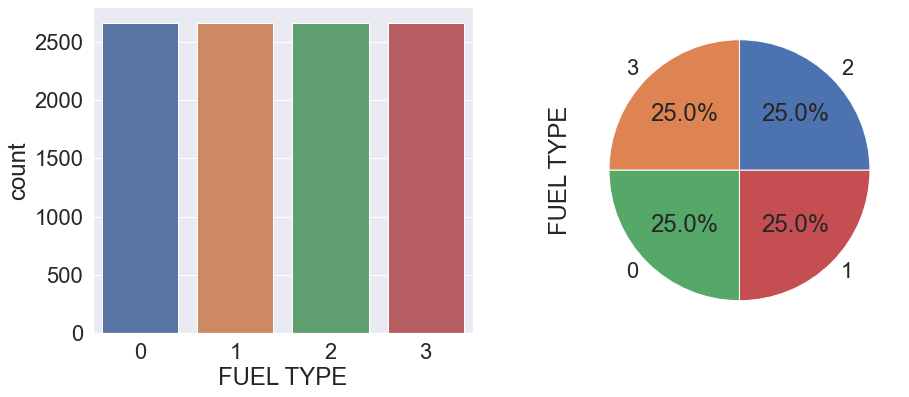

In [307]:
# Plot of the dataset
df_bal = pd.concat([x4_res,y4_res], axis = 1) # creating a dataframe for the balanced data
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='FUEL TYPE',data=df_bal, ax=ax[0]) # assigning each of the plot to the axis shell
a= df_bal['FUEL TYPE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning each of the plot to the axis shell

In [308]:

#Split into train, test and validation()
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=1) #traintest split
x4,y4=x4_train,y4_train

x4_train, x4_val, y4_train, y4_val = train_test_split(x4, y4, test_size=0.2, random_state=1) #train validation split

In [309]:
model.fit(x4_train, y4_train)

DecisionTreeClassifier()

In [310]:
report_model(model, x4_train, y4_train)

                   Feature_importance
TRANSMISSION                 0.301976
FC HWY (L/100 km)            0.698024
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1716
           1       0.90      0.96      0.93      1667
           2       0.84      0.84      0.84      1746
           3       0.88      0.76      0.81      1687

    accuracy                           0.89      6816
   macro avg       0.89      0.89      0.89      6816
weighted avg       0.89      0.89      0.89      6816



KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

In [311]:
report_model(model, x4_test, y4_test)

                   Feature_importance
TRANSMISSION                 0.301976
FC HWY (L/100 km)            0.698024
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       517
           1       0.90      0.94      0.92       542
           2       0.78      0.80      0.79       527
           3       0.83      0.72      0.77       545

    accuracy                           0.86      2131
   macro avg       0.86      0.86      0.86      2131
weighted avg       0.86      0.86      0.86      2131



KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

In [312]:
report_model(model, x4_val, y4_val)

                   Feature_importance
TRANSMISSION                 0.301976
FC HWY (L/100 km)            0.698024
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       430
           1       0.89      0.95      0.92       454
           2       0.77      0.79      0.78       390
           3       0.84      0.71      0.77       431

    accuracy                           0.87      1705
   macro avg       0.86      0.87      0.86      1705
weighted avg       0.87      0.87      0.87      1705



KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

#### Clustering
Use only the non-categorical variables to form groups. Using internal and external 
evaluation metrics, determine which categorical variable best describes the groups 
formed.

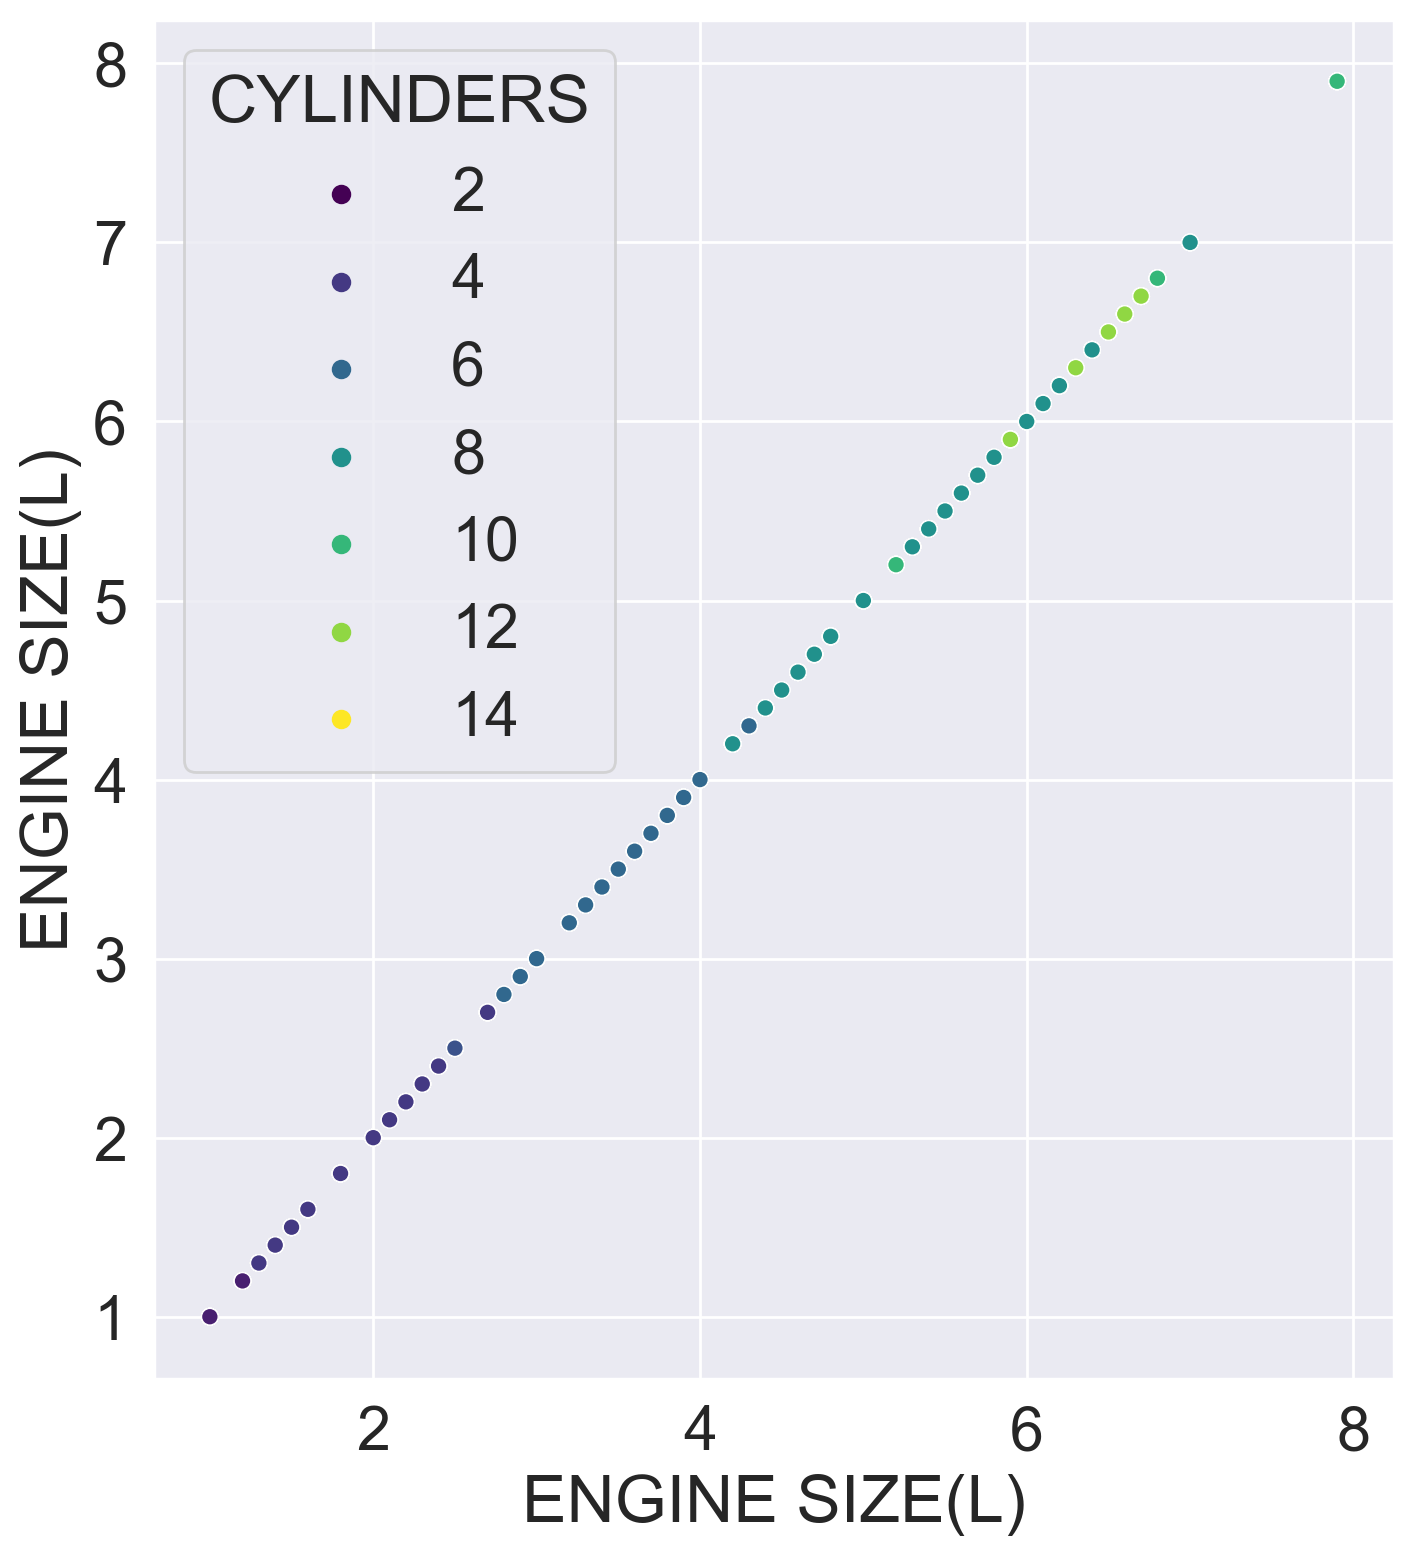

KeyboardInterrupt: 

In [318]:
# ploting the attributes to see how they affect the clusters formed
for col1 in df_num.columns:
    for col2 in df_num.columns:
        plt.figure(figsize = (8,9),dpi = 200)
        sns.set(font_scale=2)
        sns.scatterplot(data = df_num, x = df_num[col1],y = df_num[col2],
        hue='CYLINDERS', palette = 'viridis')
        plt.show()

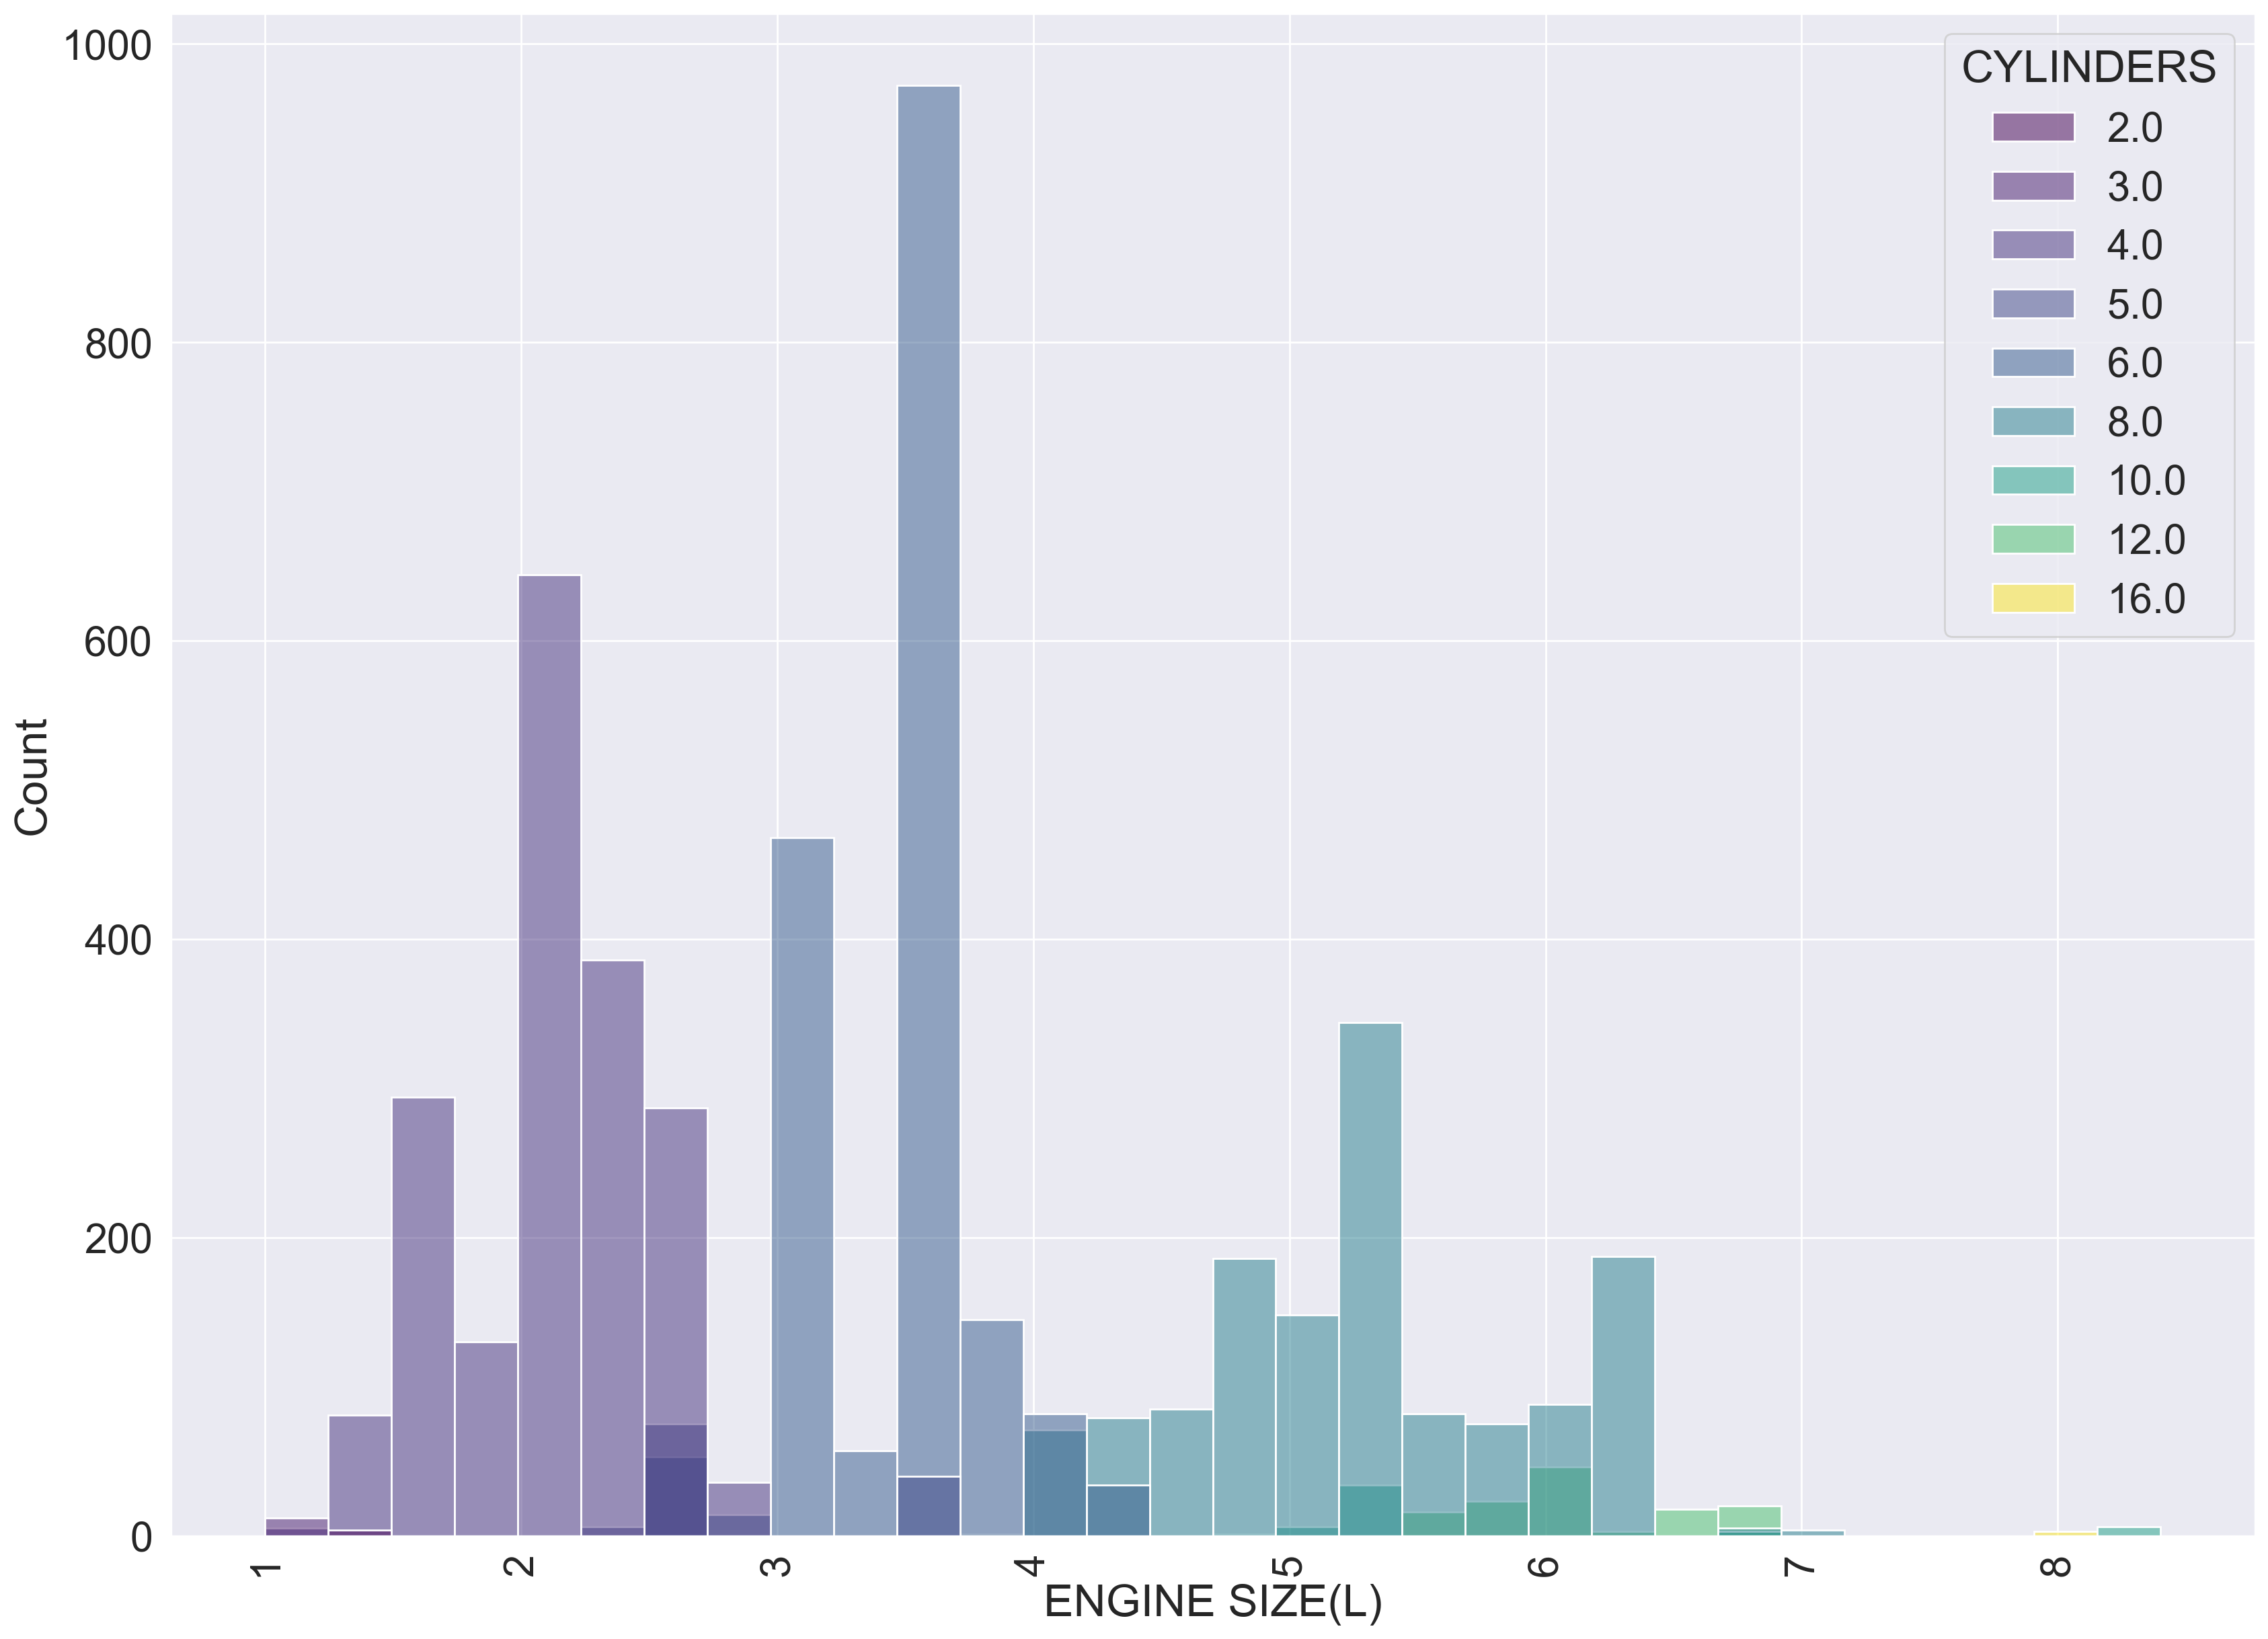

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

In [320]:
# Plotting the histogram to see their relationship with categories
for col in df_num.columns:
    sns.set(font_scale=2)
    plt.figure(figsize=(20,15), dpi = 200)
    sns.histplot(data=df,x = col, hue = 'CYLINDERS', palette = 'viridis')
    plt.xticks(rotation=90)

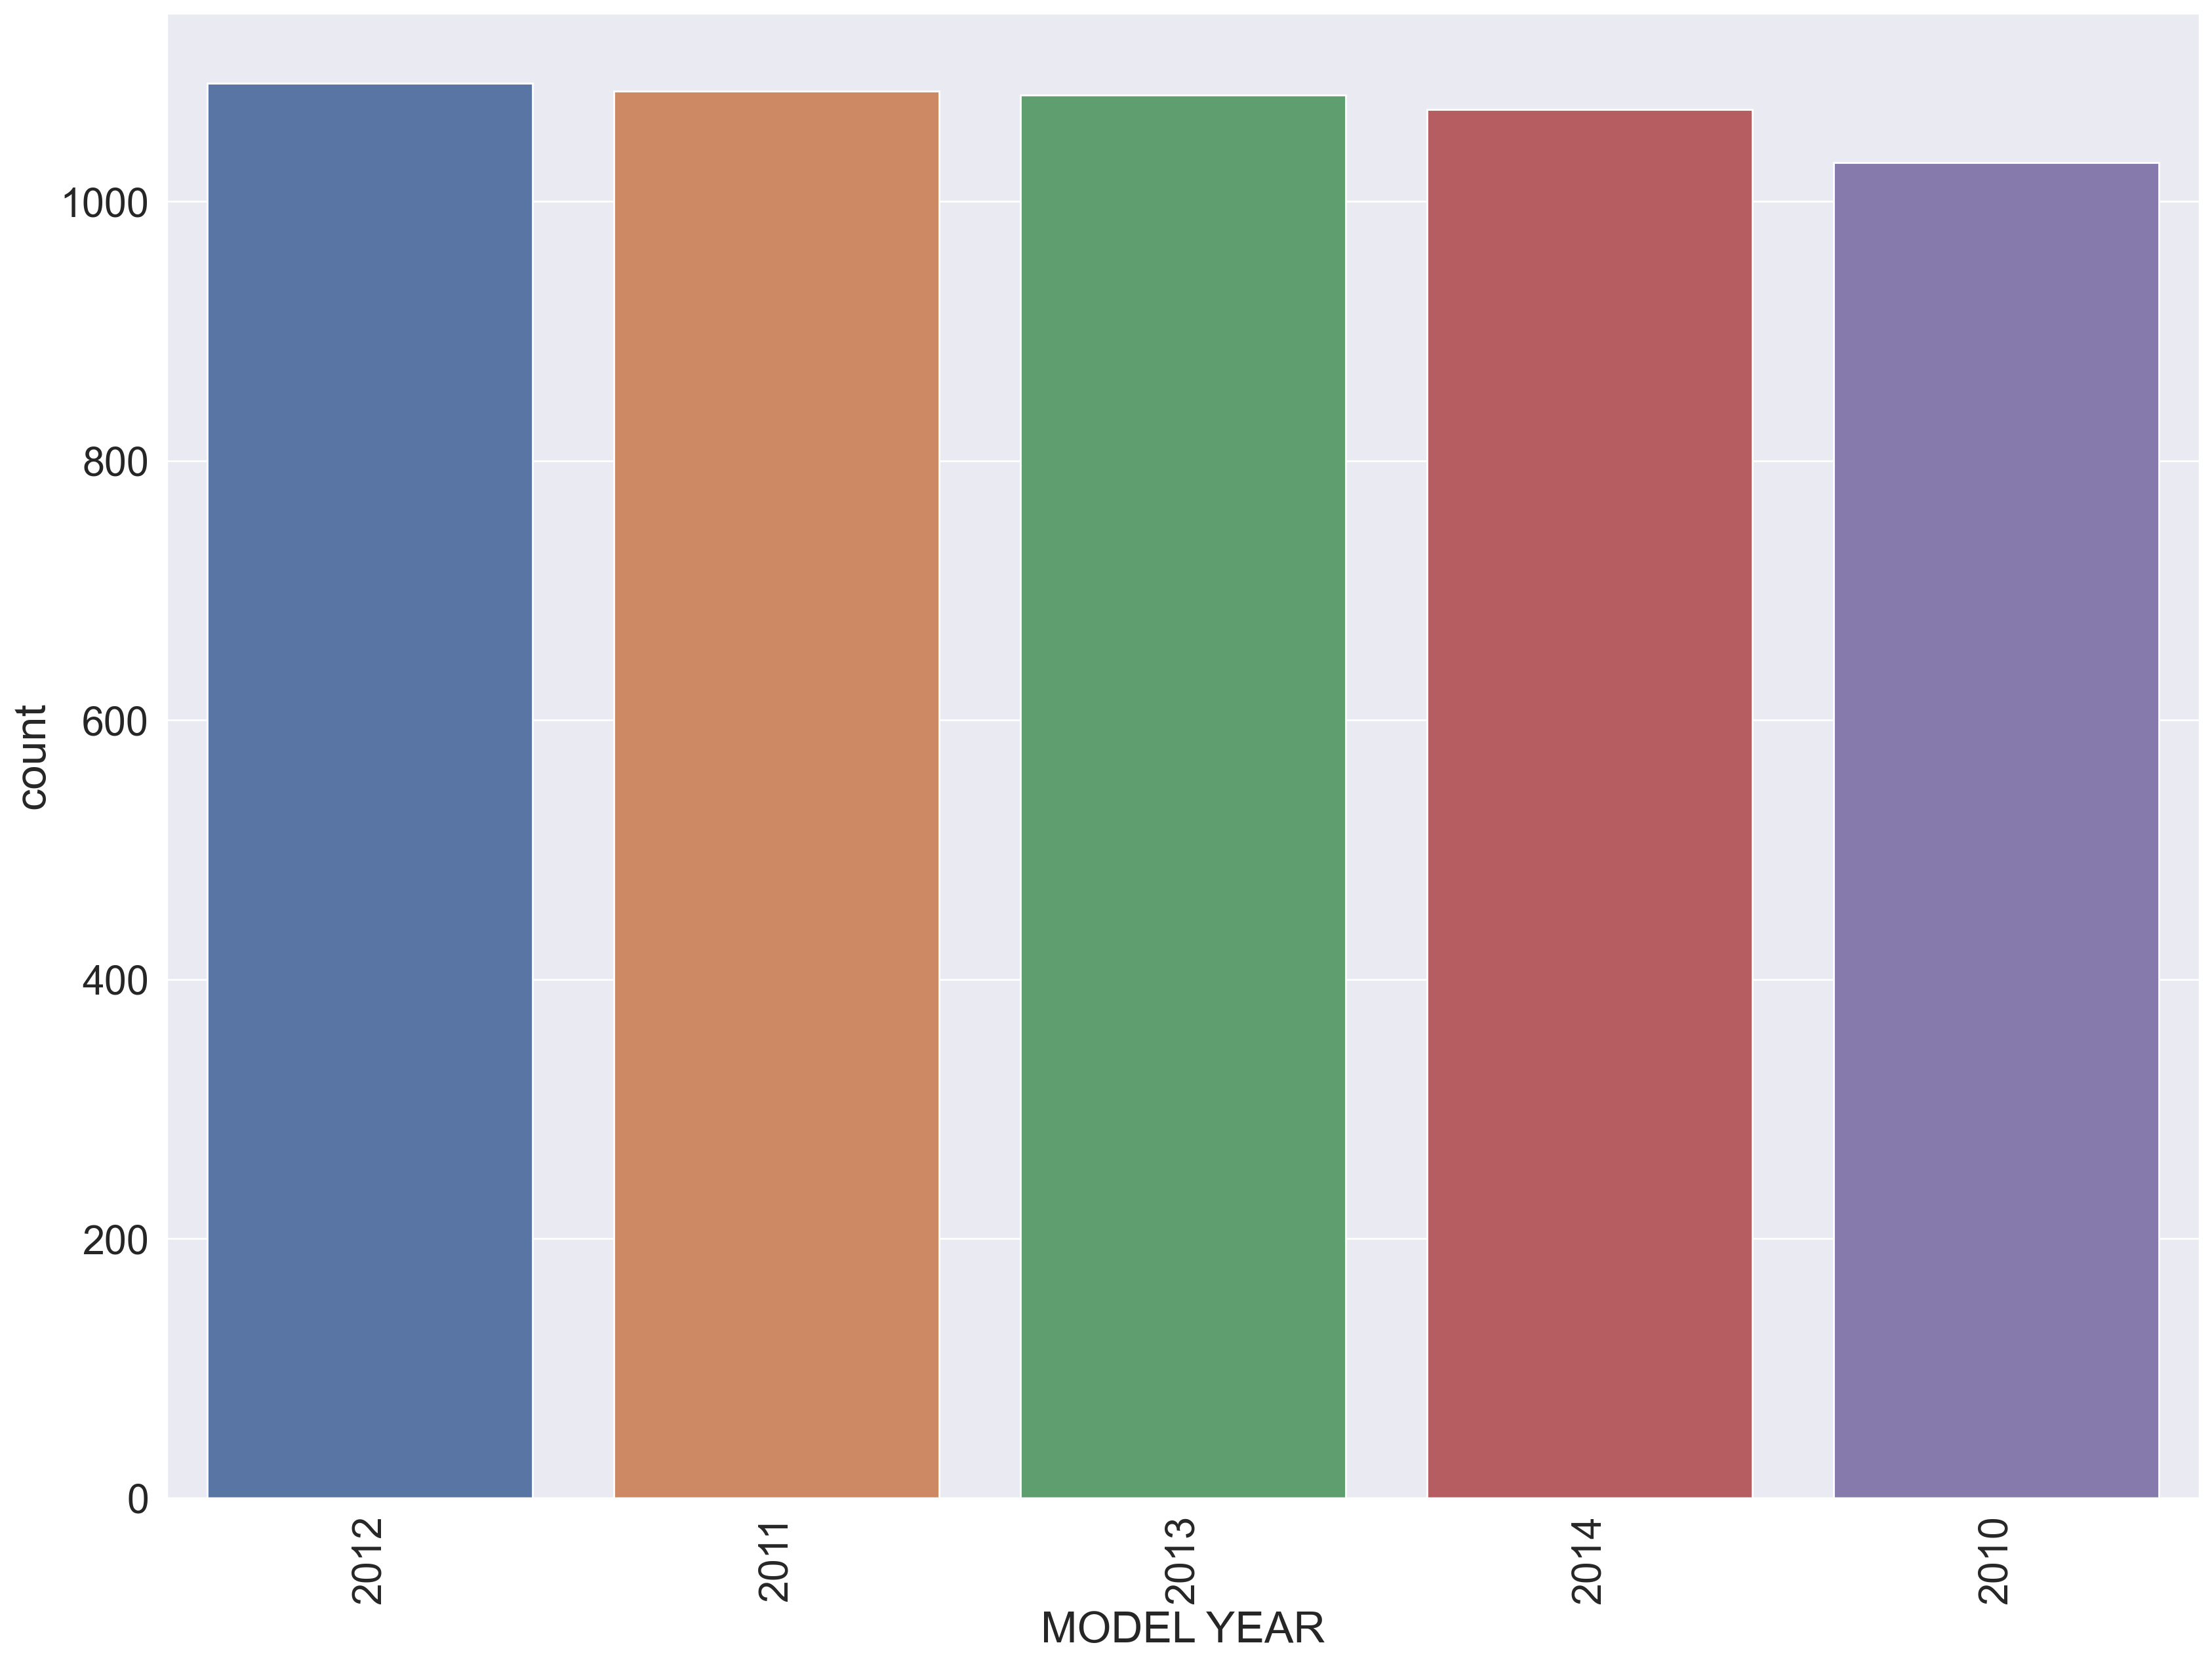

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

In [321]:
# Plotting the count of the values to see the useful categories
for col in object_df.columns:
    sns.set(font_scale=2)
    plt.figure(figsize=(20,15), dpi = 200)
    sns.countplot(data = object_df,x=col, order = object_df[col].value_counts().index)
    plt.xticks(rotation = 90)

In [316]:
#Encodeded caterogical data
df_le.head(5)

MODEL YEAR  MAKE  MODEL  VEHICLE CLASS  TRANSMISSION  FUEL TYPE
0           0     0    352              0            10          2
1           0     0    352              0            19          2
2           0     0    352              0            20          3
3           0     0    734             11            11          3
4           0     0    884             11            10          3

In [314]:
#drop model year and model as it has little effect to the data
obj_df = df_le.drop(['MODEL YEAR'], axis =1)

In [317]:
obj_df.head(5)

MAKE  MODEL  VEHICLE CLASS  TRANSMISSION  FUEL TYPE
0     0    352              0            10          2
1     0    352              0            19          2
2     0    352              0            20          3
3     0    734             11            11          3
4     0    884             11            10          3

#### Scaling the dataset

In [322]:
from sklearn.preprocessing import MinMaxScaler

In [323]:
scaler = MinMaxScaler()

In [324]:
scaled_num_df=scaler.fit_transform(df_num)
scaled_num_df

array([[0.14492754, 0.16666667, 0.33684211, ..., 0.30967742, 0.6031746 ,
        0.34365325],
       [0.14492754, 0.16666667, 0.28947368, ..., 0.27096774, 0.66666667,
        0.3003096 ],
       [0.14492754, 0.16666667, 0.37368421, ..., 0.34193548, 0.53968254,
        0.37770898],
       ...,
       [0.28985507, 0.33333333, 0.46842105, ..., 0.45806452, 0.41269841,
        0.50464396],
       [0.31884058, 0.33333333, 0.44210526, ..., 0.42580645, 0.44444444,
        0.47058824],
       [0.31884058, 0.33333333, 0.54736842, ..., 0.52258065, 0.34920635,
        0.57585139]])

In [325]:
scaled_obj_df=scaler.fit_transform(obj_df)
scaled_obj_df

array([[0.        , 0.29114971, 0.        , 0.47619048, 0.66666667],
       [0.        , 0.29114971, 0.        , 0.9047619 , 0.66666667],
       [0.        , 0.29114971, 0.        , 0.95238095, 1.        ],
       ...,
       [1.        , 0.9445823 , 0.75      , 0.52380952, 0.66666667],
       [1.        , 0.9445823 , 0.75      , 0.52380952, 0.66666667],
       [1.        , 0.94789082, 0.8125    , 0.52380952, 0.66666667]])

#### Kmeans Clusttering

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_k

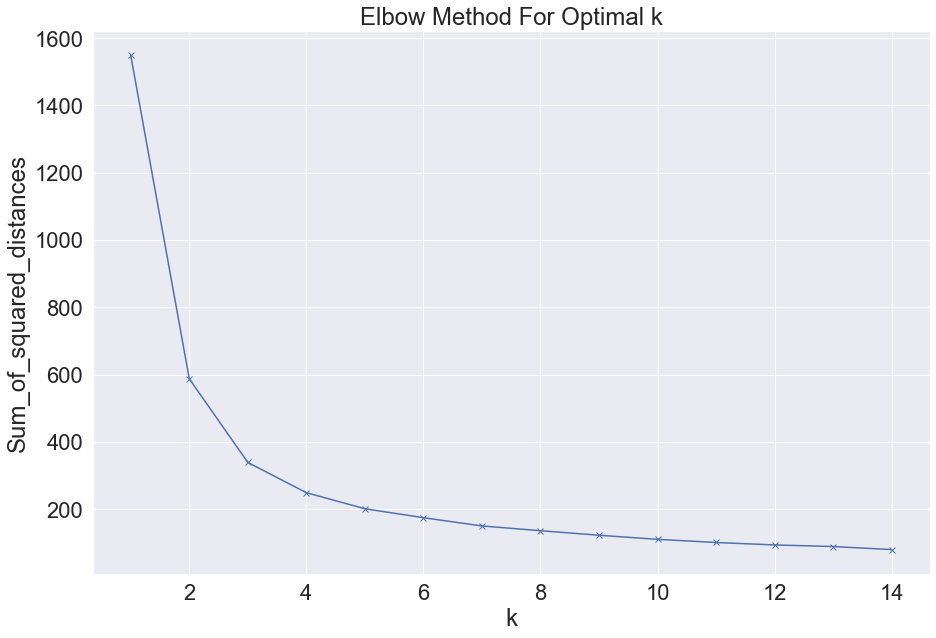

In [326]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_num_df)
    Sum_of_squared_distances.append(km.inertia_)
#Visualing the plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.savefig('Elbow Curve')
plt.show()

#### Elbow curve is at 2 which means optimal value of k is 2

#### Training the Model

In [327]:
from sklearn.cluster import KMeans # import KMeans 

In [328]:
model = KMeans(n_clusters=2, random_state = 0) # assigning the number of clusters to 2

In [329]:
cluster_labels = model.fit_predict(scaled_num_df) # fiting and predicting the clusters using numerical variabies
cluster_labels

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [330]:
obj_df['CLUSTER']=cluster_labels

In [331]:
obj_df.head(5)

MAKE  MODEL  VEHICLE CLASS  TRANSMISSION  FUEL TYPE  CLUSTER
0     0    352              0            10          2        0
1     0    352              0            19          2        0
2     0    352              0            20          3        0
3     0    734             11            11          3        1
4     0    884             11            10          3        0

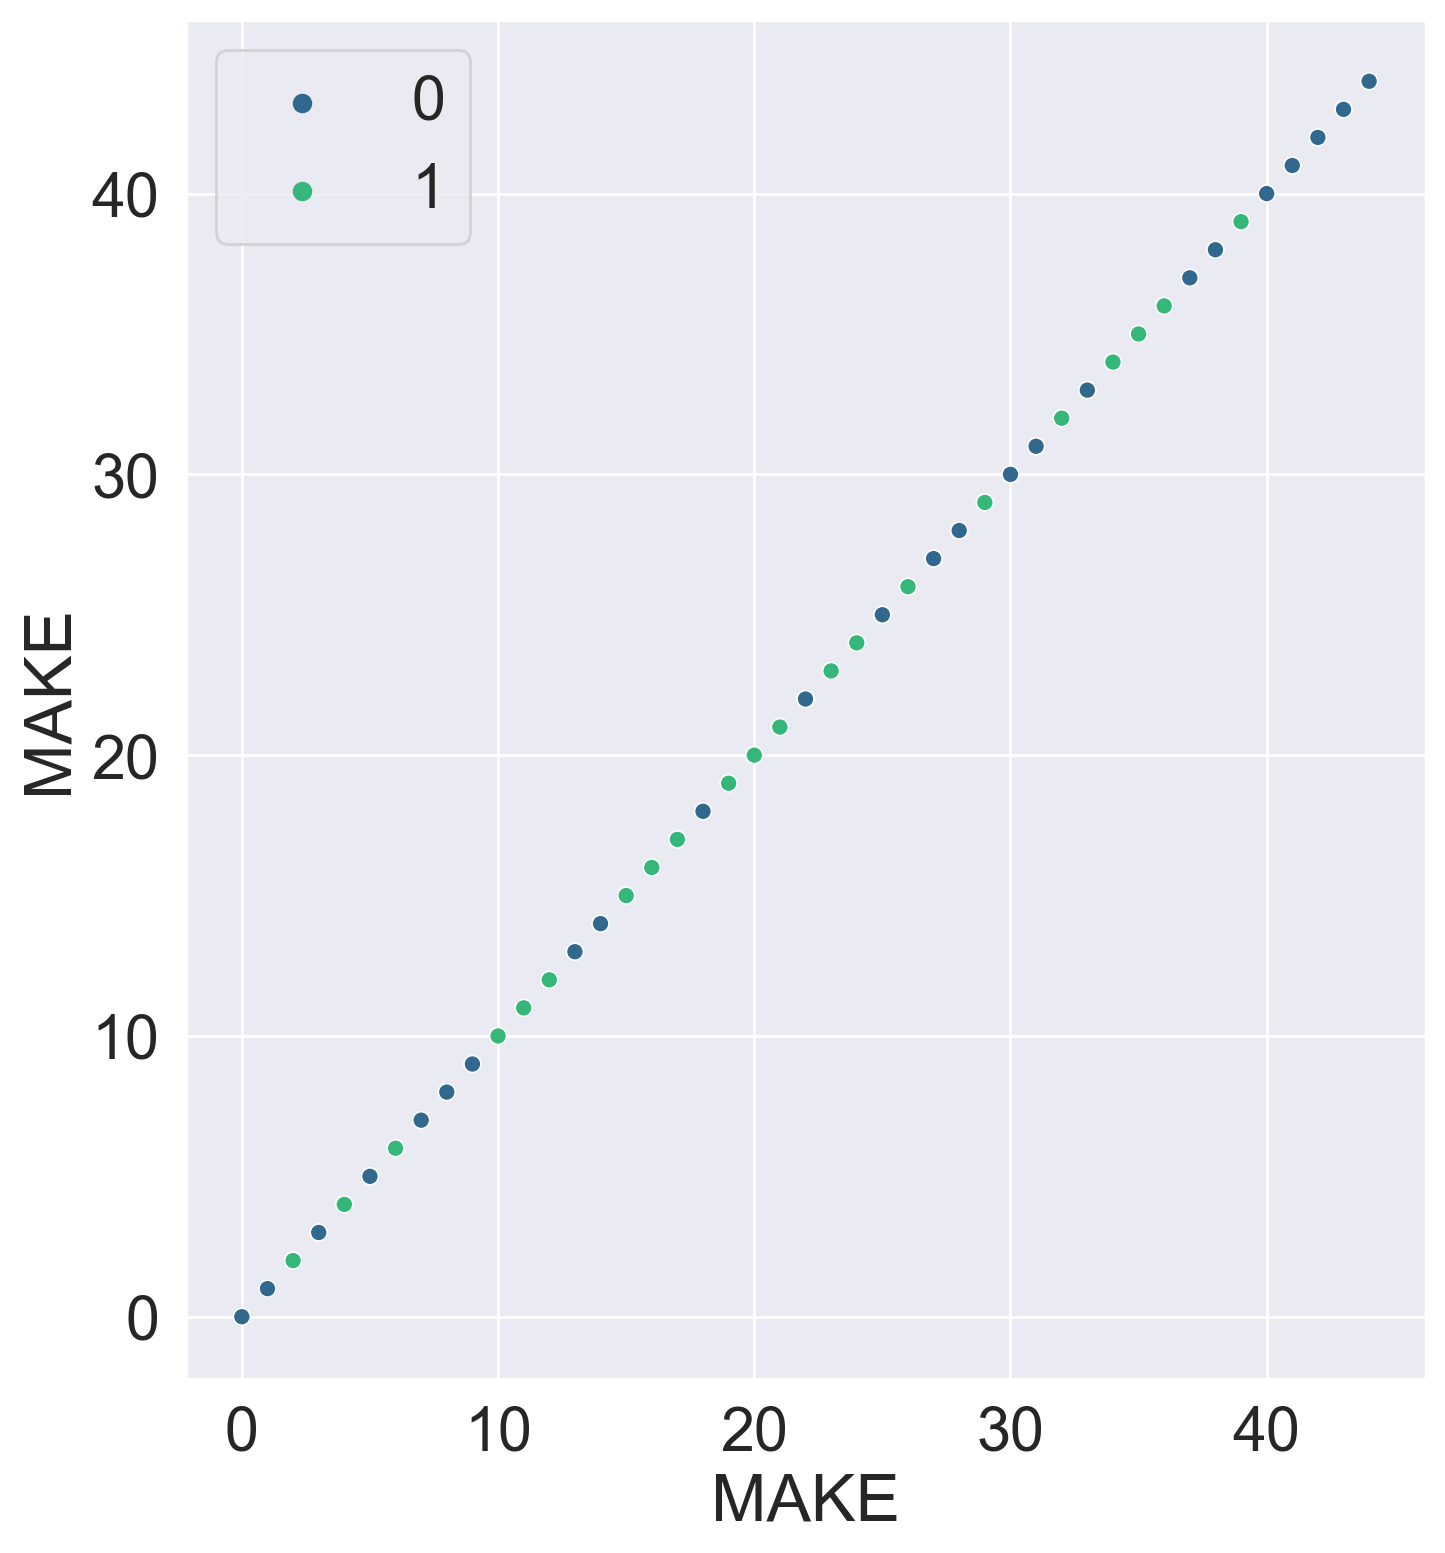

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A8312CBF70> (for post_execute):


KeyboardInterrupt: 

In [332]:
obj_df.drop('CLUSTER', axis = 1, inplace = True)
for col1 in obj_df.columns:
    for col2 in obj_df.columns:
        plt.figure(figsize = (8,9),dpi = 200)
        sns.set(font_scale=2)
        sns.scatterplot(data = obj_df, x = obj_df[col1],y = obj_df[col2],
        hue=cluster_labels, palette = 'viridis')
        plt.savefig('all clus')
        plt.show()

### Clustering evaluation

In [333]:
#### Internal Evaluation
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [334]:
DB_index=davies_bouldin_score(scaled_obj_df,cluster_labels) #df_le = Encoded Cateogircal varialbes
DB_index                                            #cluster_label = only numerical variables used

3.7404331741115793

In [335]:
sil_score=silhouette_score(scaled_obj_df,cluster_labels)
sil_score

0.058007335495500634

In [336]:
from sklearn.cluster import AgglomerativeClustering #here we import

In [337]:
model = AgglomerativeClustering(n_clusters=7,linkage='single')

In [338]:
cluster_labels=model.fit_predict(scaled_num_df)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [339]:
DB_index=davies_bouldin_score(scaled_obj_df,cluster_labels)
DB_index

1.8904258185453724

In [340]:
sil_score=silhouette_score(scaled_obj_df,cluster_labels)
sil_score

-0.1932513750592529

In [341]:
from sklearn.cluster import AgglomerativeClustering

In [342]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0) # distance_threshold=0 means all points

In [343]:
cluster_labels=model.fit_predict(scaled_num_df)
cluster_labels

array([5358, 5357, 5356, ...,    5,    2,    0], dtype=int64)

In [344]:
from scipy.cluster import hierarchy # scipy is used for plotting the hierarchy
from scipy.cluster.hierarchy import dendrogram

In [345]:
matrix_linkage = hierarchy.linkage(model.children_) # hierarchy is used to obtain the children
matrix_linkage # distances between the points 

array([[0.00000000e+00, 1.00000000e+00, 1.41421356e+00, 2.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 1.41421356e+00, 2.00000000e+00],
       [1.10000000e+01, 1.20000000e+01, 1.41421356e+00, 2.00000000e+00],
       ...,
       [8.29300000e+03, 1.07110000e+04, 4.18294155e+02, 5.35600000e+03],
       [5.21500000e+03, 1.07120000e+04, 4.23382806e+02, 5.35700000e+03],
       [4.89800000e+03, 1.07130000e+04, 4.99081156e+02, 5.35800000e+03]])

In [ ]:
plt.figure(figsize=(20,12), dpi = 200,)
dendrogram(Z=matrix_linkage,truncate_mode= 'level', p= 7);